# all


## 1번 데이터셋 선정이유와 split 비율 설명하기

In [310]:
'''
invistico airline dataset을 선택했다.

그 이유는 해당 데이터셋의 문제는 만족도 조사를 하는 것인데 만족도를 분류할 때 어떤 특성 조건이 만족도가 1이 
되도록 만들었는지, 어떤 특성이 만족도가 0이 되도록 만들었는지 밝히는 것이 필요하기 때문이다.
따라서 decision tree를 통해 1과 0으로 분류된 rule을 확인한다면 그 룰을 기반으로 앞으로 고객의 만족도를
더 높이기 위해 어떻게 할지를 반영할 수 있을 것이다. 

데이터는 3896개의 행과 만족도를 포함하여 23개의 column으로 구성되어 있다. 

데이터 양이 충분하다면 training data의 비율을 더 높이겠지만 데이터 양이 많은 편이 아니기 때문에
valid와 test를 위한 데이터도 어느정도 확보될 필요가 있었다.
따라서 전통적으로 많이 사용하는 split 비율인 6:2:2로 train valid test 데이터를 split했다. 



'''

'\ninvistico airline dataset을 선택했다.\n\n그 이유는 해당 데이터셋의 문제는 만족도 조사를 하는 것인데 만족도를 분류할 때 어떤 특성 조건이 만족도가 1이 \n되도록 만들었는지, 어떤 특성이 만족도가 0이 되도록 만들었는지 밝히는 것이 필요하기 때문이다.\n따라서 decision tree를 통해 1과 0으로 분류된 rule을 확인한다면 그 룰을 기반으로 앞으로 고객의 만족도를\n더 높이기 위해 어떻게 할지를 반영할 수 있을 것이다. \n\n데이터는 3896개의 행과 만족도를 포함하여 23개의 column으로 구성되어 있다. \n\n데이터 양이 충분하다면 training data의 비율을 더 높이겠지만 데이터 양이 많은 편이 아니기 때문에\nvalid와 test를 위한 데이터도 어느정도 확보될 필요가 있었다.\n따라서 전통적으로 많이 사용하는 split 비율인 6:2:2로 train valid test 데이터를 split했다. \n\n\n\n'

## 데이터 호출 및 기초 전처리

이상치 제거

원핫인코딩 drop first

null포함 행 제거

In [311]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [312]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 통계 학습을 위한 패키지
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 기계 학습을 위한 패키지
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

In [313]:
airline = pd.read_csv("/content/drive/MyDrive/data_sample/train_set.csv")
airline

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,28,Business travel,Eco Plus,1513,1,3,3,3,...,1,4,2,1,3,2,1,0,2.0,dissatisfied
1,Female,Loyal Customer,33,Personal Travel,Eco,3066,5,5,5,5,...,4,4,4,4,5,4,3,0,10.0,satisfied
2,Female,Loyal Customer,32,Personal Travel,Eco,1713,1,1,1,1,...,3,3,4,3,5,3,4,0,0.0,satisfied
3,Female,Loyal Customer,60,Business travel,Business,1789,4,4,4,4,...,5,5,5,5,4,5,5,0,0.0,satisfied
4,Male,Loyal Customer,61,Personal Travel,Eco,1595,3,4,3,1,...,4,2,1,4,1,4,4,37,29.0,dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,Male,Loyal Customer,60,Personal Travel,Eco,2199,3,5,3,4,...,3,5,3,4,3,4,3,12,6.0,dissatisfied
3892,Female,Loyal Customer,41,Business travel,Business,582,2,4,2,2,...,4,4,4,4,4,4,5,0,0.0,satisfied
3893,Female,Loyal Customer,67,Personal Travel,Eco,4211,3,4,4,1,...,3,2,2,3,1,5,1,110,157.0,dissatisfied
3894,Female,Loyal Customer,36,Business travel,Business,2952,1,1,1,1,...,3,3,4,3,5,3,3,83,80.0,satisfied


In [314]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3896 non-null   object 
 1   Customer Type                      3896 non-null   object 
 2   Age                                3896 non-null   int64  
 3   Type of Travel                     3896 non-null   object 
 4   Class                              3896 non-null   object 
 5   Flight Distance                    3896 non-null   int64  
 6   Seat comfort                       3896 non-null   int64  
 7   Departure/Arrival time convenient  3896 non-null   int64  
 8   Food and drink                     3896 non-null   int64  
 9   Gate location                      3896 non-null   int64  
 10  Inflight wifi service              3896 non-null   int64  
 11  Inflight entertainment             3896 non-null   int64

In [315]:
airline.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3884.000000
mean,39.386037,1973.763090,2.866273,2.970483,2.881417,2.972023,3.259240,3.413244,3.501027,3.471509,3.452259,3.477156,3.707906,3.393994,3.695585,3.353696,13.578285,14.211895
std,15.210828,1021.122745,1.392381,1.532833,1.444321,1.303491,1.317422,1.328147,1.302116,1.300028,1.283961,1.286043,1.154285,1.263512,1.171875,1.288899,35.250653,35.853849
min,7.000000,50.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,27.000000,1374.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1920.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,2522.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,10.000000,13.000000
max,80.000000,6664.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,537.000000,524.000000


In [316]:
# null 행 제거
airline = airline.dropna(axis=0)
airline.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [317]:
# 이상치 제거
Q1 = airline[["Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]].quantile(q=0.25)
Q3 = airline[["Age","Flight Distance","Departure Delay in Minutes","Arrival Delay in Minutes"]].quantile(q=0.75)
IQR = Q3-Q1
IQR_df = airline[(airline["Age"] <= Q3['Age']+1.5*IQR['Age']) & (airline["Age"] >= Q1['Age']-1.5*IQR['Age'])]
IQR_df = airline[(airline["Flight Distance"] <= Q3['Flight Distance']+1.5*IQR['Flight Distance']) & (airline['Flight Distance'] >= Q1['Flight Distance']-1.5*IQR['Flight Distance'])]
IQR_df = airline[(airline["Departure Delay in Minutes"] <= Q3['Departure Delay in Minutes']+1.5*IQR['Departure Delay in Minutes']) & (airline["Departure Delay in Minutes"] >= Q1['Departure Delay in Minutes']-1.5*IQR['Departure Delay in Minutes'])]
IQR_df = airline[(airline["Arrival Delay in Minutes"] <= Q3['Arrival Delay in Minutes']+1.5*IQR['Arrival Delay in Minutes']) & (airline['Arrival Delay in Minutes'] >= Q1['Arrival Delay in Minutes']-1.5*IQR['Arrival Delay in Minutes'])]
print('original_df :', len(airline))
print('IQR_df :', len(IQR_df))

original_df : 3884
IQR_df : 3389


In [318]:
airline_df =IQR_df

In [319]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [320]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

import graphviz 

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [321]:
# Performance Evaluation Function ------------------------------------------------
def perf_eval(cm):
    _tp = cm[1, 1]
    _fn = cm[1, 0]
    _fp = cm[0, 1]
    _tn = cm[0, 0]

    # True positive rate: TPR (Recall)
    TPR = _tp / (_tp + _fn)
    # Precision
    PRE = _tp/(_tp+_fp)
    # True negative rate: TNR
    TNR = _tn/(_tn+_fp)
    # Simple Accuracy
    ACC = (_tp + _tn) / np.sum(cm)
    # Balanced Correction Rate
    BCR = np.sqrt(TPR*TNR)
    # F1-Measure
    F1 = 2*TPR*PRE/(TPR+PRE)
    
    return TPR, PRE, TNR, ACC, BCR, F1

In [322]:
# Performance table
Perf_Table = pd.DataFrame(index=["Post-Pruning", "Pre-Pruning"],
                          columns = ["TPR", "Precision", "TNR", 
                                     "Accuracy", "BCR", "F1-Measure"])

In [323]:
Perf_Table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,NaN,NaN,NaN,NaN,NaN,NaN
Pre-Pruning,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
# target value값 1,2에서 0,1로 변경

airline_df.loc[airline_df['satisfaction'] == 'dissatisfied', 'satisfaction'] = 0
airline_df.loc[airline_df['satisfaction'] == 'satisfied', 'satisfaction'] = 1

airline_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,28,Business travel,Eco Plus,1513,1,3,3,3,...,1,4,2,1,3,2,1,0,2.0,0
1,Female,Loyal Customer,33,Personal Travel,Eco,3066,5,5,5,5,...,4,4,4,4,5,4,3,0,10.0,1
2,Female,Loyal Customer,32,Personal Travel,Eco,1713,1,1,1,1,...,3,3,4,3,5,3,4,0,0.0,1
3,Female,Loyal Customer,60,Business travel,Business,1789,4,4,4,4,...,5,5,5,5,4,5,5,0,0.0,1
4,Male,Loyal Customer,61,Personal Travel,Eco,1595,3,4,3,1,...,4,2,1,4,1,4,4,37,29.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,Female,Loyal Customer,30,Personal Travel,Eco,1323,5,3,3,3,...,5,5,5,5,5,5,2,0,0.0,1
3890,Male,Loyal Customer,47,Business travel,Eco,1511,5,1,3,1,...,5,4,2,3,4,1,5,0,0.0,1
3891,Male,Loyal Customer,60,Personal Travel,Eco,2199,3,5,3,4,...,3,5,3,4,3,4,3,12,6.0,0
3892,Female,Loyal Customer,41,Business travel,Business,582,2,4,2,2,...,4,4,4,4,4,4,5,0,0.0,1


In [325]:
# Load the data & Preprocessing
# Ploan = pd.read_csv("Personal Loan.csv")
columns = airline_df.columns.values
input_idx = [0,1, 2, 3,4, 5, 6, 7, 8,9, 10, 11, 12, 13,14,15,16,17,18,19,20,21]
target_idx = 22

airline_input = airline_df[columns[input_idx]]
airline_target = airline_df[columns[target_idx]]

# 

In [326]:
airline_input

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,28,Business travel,Eco Plus,1513,1,3,3,3,...,1,1,4,2,1,3,2,1,0,2.0
1,Female,Loyal Customer,33,Personal Travel,Eco,3066,5,5,5,5,...,4,4,4,4,4,5,4,3,0,10.0
2,Female,Loyal Customer,32,Personal Travel,Eco,1713,1,1,1,1,...,5,3,3,4,3,5,3,4,0,0.0
3,Female,Loyal Customer,60,Business travel,Business,1789,4,4,4,4,...,5,5,5,5,5,4,5,5,0,0.0
4,Male,Loyal Customer,61,Personal Travel,Eco,1595,3,4,3,1,...,4,4,2,1,4,1,4,4,37,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3889,Female,Loyal Customer,30,Personal Travel,Eco,1323,5,3,3,3,...,1,5,5,5,5,5,5,2,0,0.0
3890,Male,Loyal Customer,47,Business travel,Eco,1511,5,1,3,1,...,5,5,4,2,3,4,1,5,0,0.0
3891,Male,Loyal Customer,60,Personal Travel,Eco,2199,3,5,3,4,...,3,3,5,3,4,3,4,3,12,6.0
3892,Female,Loyal Customer,41,Business travel,Business,582,2,4,2,2,...,5,4,4,4,4,4,4,5,0,0.0


In [327]:
airline_target

0       0
1       1
2       1
3       1
4       0
       ..
3889    1
3890    1
3891    0
3892    1
3895    0
Name: satisfaction, Length: 3389, dtype: object

In [328]:
# reset index

airline_input = airline_input.reset_index(drop=True)
airline_target = airline_target.reset_index(drop=True)
airline_target

0       0
1       1
2       1
3       1
4       0
       ..
3384    1
3385    1
3386    0
3387    1
3388    0
Name: satisfaction, Length: 3389, dtype: object

In [329]:
airline_target2 = airline_target.astype('int64')
airline_target2

0       0
1       1
2       1
3       1
4       0
       ..
3384    1
3385    1
3386    0
3387    1
3388    0
Name: satisfaction, Length: 3389, dtype: int64

In [330]:
airline_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389 entries, 0 to 3388
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3389 non-null   object 
 1   Customer Type                      3389 non-null   object 
 2   Age                                3389 non-null   int64  
 3   Type of Travel                     3389 non-null   object 
 4   Class                              3389 non-null   object 
 5   Flight Distance                    3389 non-null   int64  
 6   Seat comfort                       3389 non-null   int64  
 7   Departure/Arrival time convenient  3389 non-null   int64  
 8   Food and drink                     3389 non-null   int64  
 9   Gate location                      3389 non-null   int64  
 10  Inflight wifi service              3389 non-null   int64  
 11  Inflight entertainment             3389 non-null   int64

In [331]:
airline_input['Class'].unique()

array(['Eco Plus', 'Eco', 'Business'], dtype=object)

In [332]:
# one hot encoding 진행

airline_input2= pd.get_dummies(airline_input, columns=['Gender','Customer Type','Type of Travel','Class'],drop_first=True)
airline_input2

# Gender 2 ['Male', 'Female']
# Customer type 2 ['Loyal Customer', 'disloyal Customer']
# type of class 3 ['Business travel', 'Personal Travel']
# class 2 ['Eco Plus', 'Eco', 'Business']


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,28,1513,1,3,3,3,1,1,1,1,...,3,2,1,0,2.0,1,0,0,0,1
1,33,3066,5,5,5,5,3,4,4,4,...,5,4,3,0,10.0,0,0,1,1,0
2,32,1713,1,1,1,1,5,4,5,3,...,5,3,4,0,0.0,0,0,1,1,0
3,60,1789,4,4,4,4,3,4,5,5,...,4,5,5,0,0.0,0,0,0,0,0
4,61,1595,3,4,3,1,4,3,4,4,...,1,4,4,37,29.0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,30,1323,5,3,3,3,1,5,1,5,...,5,5,2,0,0.0,0,0,1,1,0
3385,47,1511,5,1,3,1,5,5,5,5,...,4,1,5,0,0.0,1,0,0,1,0
3386,60,2199,3,5,3,4,3,3,3,3,...,3,4,3,12,6.0,1,0,1,1,0
3387,41,582,2,4,2,2,2,4,5,4,...,4,4,5,0,0.0,0,0,0,0,0


In [448]:
X_train, X_test, y_train, y_test = train_test_split(airline_input2, 
                                                    airline_target2, 
                                                    test_size= 0.4,
                                                    stratify=airline_target,
                                                    random_state=12345)

In [449]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, 
                                                    y_test, 
                                                    test_size= 0.5,
                                                    stratify=y_test,
                                                    random_state=12345)

In [335]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(2033, 23)
(678, 23)
(678, 23)
(2033,)
(678,)
(678,)


## 2번 full tree, post pruning tree 만들기



In [336]:
X_train

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
2163,49,1905,1,1,1,1,3,4,5,4,...,3,4,5,4,0.0,0,0,0,0,0
3236,16,1445,3,3,0,3,5,0,5,5,...,1,3,5,0,0.0,1,0,1,1,0
2491,20,4148,4,4,4,4,5,5,5,5,...,5,4,5,0,0.0,0,0,0,0,0
2523,56,84,4,5,4,1,5,1,4,5,...,1,5,4,0,0.0,0,0,1,1,0
2530,58,2817,4,4,4,4,4,5,3,4,...,4,4,1,0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,37,1991,3,2,2,2,3,3,3,3,...,1,4,3,2,0.0,1,0,0,1,0
2822,31,3047,2,2,2,2,4,4,4,4,...,4,4,4,0,0.0,0,0,0,0,0
231,47,485,4,4,4,4,2,5,5,3,...,4,3,5,3,0.0,1,0,0,0,0
2566,37,880,0,4,0,1,3,5,5,4,...,4,4,3,0,0.0,0,0,1,1,0


In [337]:
y_train

2163    1
3236    0
2491    1
2523    0
2530    1
       ..
417     0
2822    1
231     1
2566    1
2624    1
Name: satisfaction, Length: 2033, dtype: int64

In [455]:
# full tree 만들기

# Classification and Regression Tree (CART) --------------------------------------
# Training the tree
clf = DecisionTreeClassifier(random_state=12345) # parameter를 밖
CART_post = clf.fit(X_train, y_train)

In [456]:
# auroc 비교
y_pred = clf.predict(X_test)
roc = roc_auc_score(y_test, y_pred)

print("ROC AUC:", roc)

ROC AUC: 0.8790680178784794


In [457]:
# auroc 비교
y_pred = best_clf.predict(X_test)
roc = roc_auc_score(y_test, y_pred)

print("ROC AUC:", roc)

ValueError: ignored

In [340]:
print(clf.tree_.max_depth)
print(clf.tree_.node_count)
print()


16
357



In [341]:
clf.score(X_train, y_train)

# acc = 100%로 오버피팅되었을 확률이 높다.

1.0

In [342]:
clf.score(X_valid, y_valid)

0.8613569321533924

In [343]:
clf.score(X_test, y_test)

# acc = 0.976

0.8805309734513275

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(best_clf,
              feature_names=airline_input2.columns.values,
              class_names=list(map(str, airline_target2.unique())),
              rounded=True, # 둥글게
              filled=True) # 색상
plt.show()

In [ ]:

import graphviz 
dot_data = export_graphviz(best_clf, 
                           out_file=None,
                           feature_names=airline_input2.columns.values,
                           class_names=list(map(str, airline_target2.unique())),
                           filled=True,
                           rounded=True,
                           special_characters=True) 
graphviz.Source(dot_data)

# 두 가지 방법은 동일. 아무거나 사용할 것

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(best_clf,
              feature_names=airline_input2.columns.values,
              class_names=list(map(str, airline_target2.unique())),
              rounded=True, # 둥글게
              filled=True) # 색상
plt.show()

In [ ]:

import graphviz 
dot_data = export_graphviz(best_clf, 
                           out_file=None,
                           feature_names=airline_input2.columns.values,
                           class_names=list(map(str, airline_target2.unique())),
                           filled=True,
                           rounded=True,
                           special_characters=True) 
graphviz.Source(dot_data)

# 두 가지 방법은 동일. 아무거나 사용할 것

In [346]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

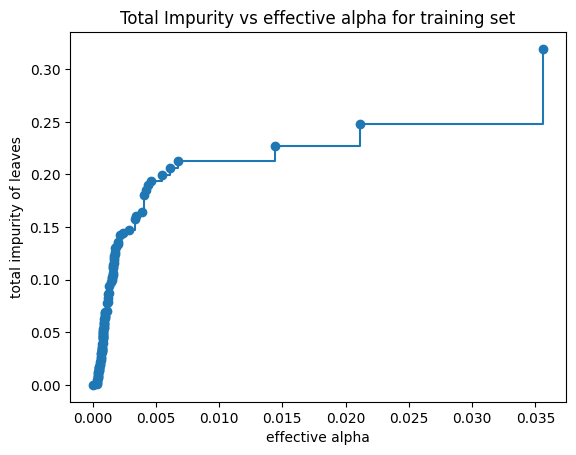

In [347]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [348]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=12345, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

#가장 단순하고 복잡도가 낮은 모델

Number of nodes in the last tree is: 1 with ccp_alpha: 0.17195345462524048


In [441]:

grid.tree_.node_count
grid.tree_.max_depth

AttributeError: ignored

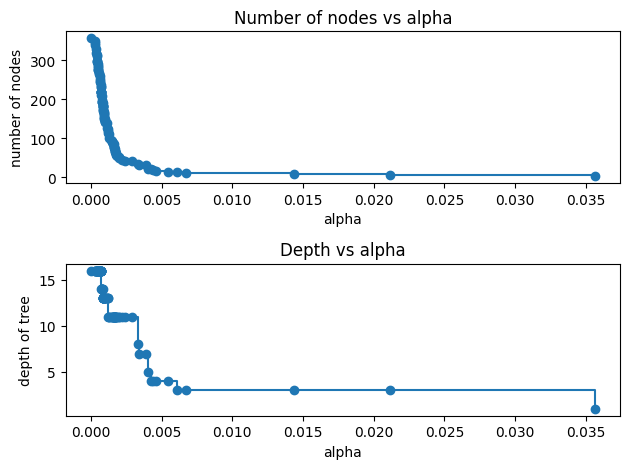

In [349]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# 알파값이 증가할수록 트리의 구조가 단순해진다. 

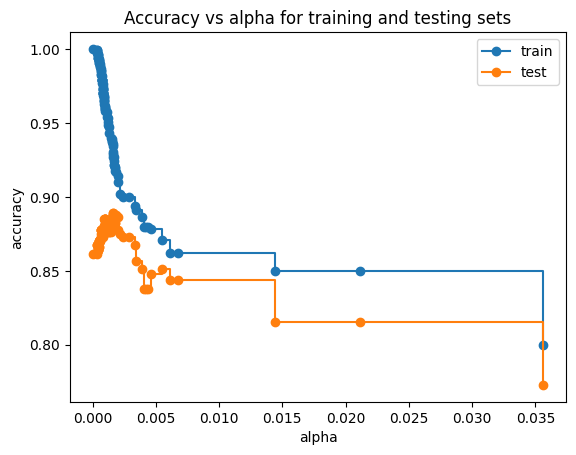

In [350]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# 알파값이 작을 때는 train에 overfitting
# 알파값이 커지면서 train acc는 떨어지지만 test acc는 증가하면서 일반화가 진행됨.

# 알파값이 작았을 때랑 조금 커졌을 때가 가장 성능이 좋다.
# 따라서 복잡했을 때의 모델이 best일수도? -> 맞네 복잡할 때가 best가 되버리네 ,, ㅠㅠ

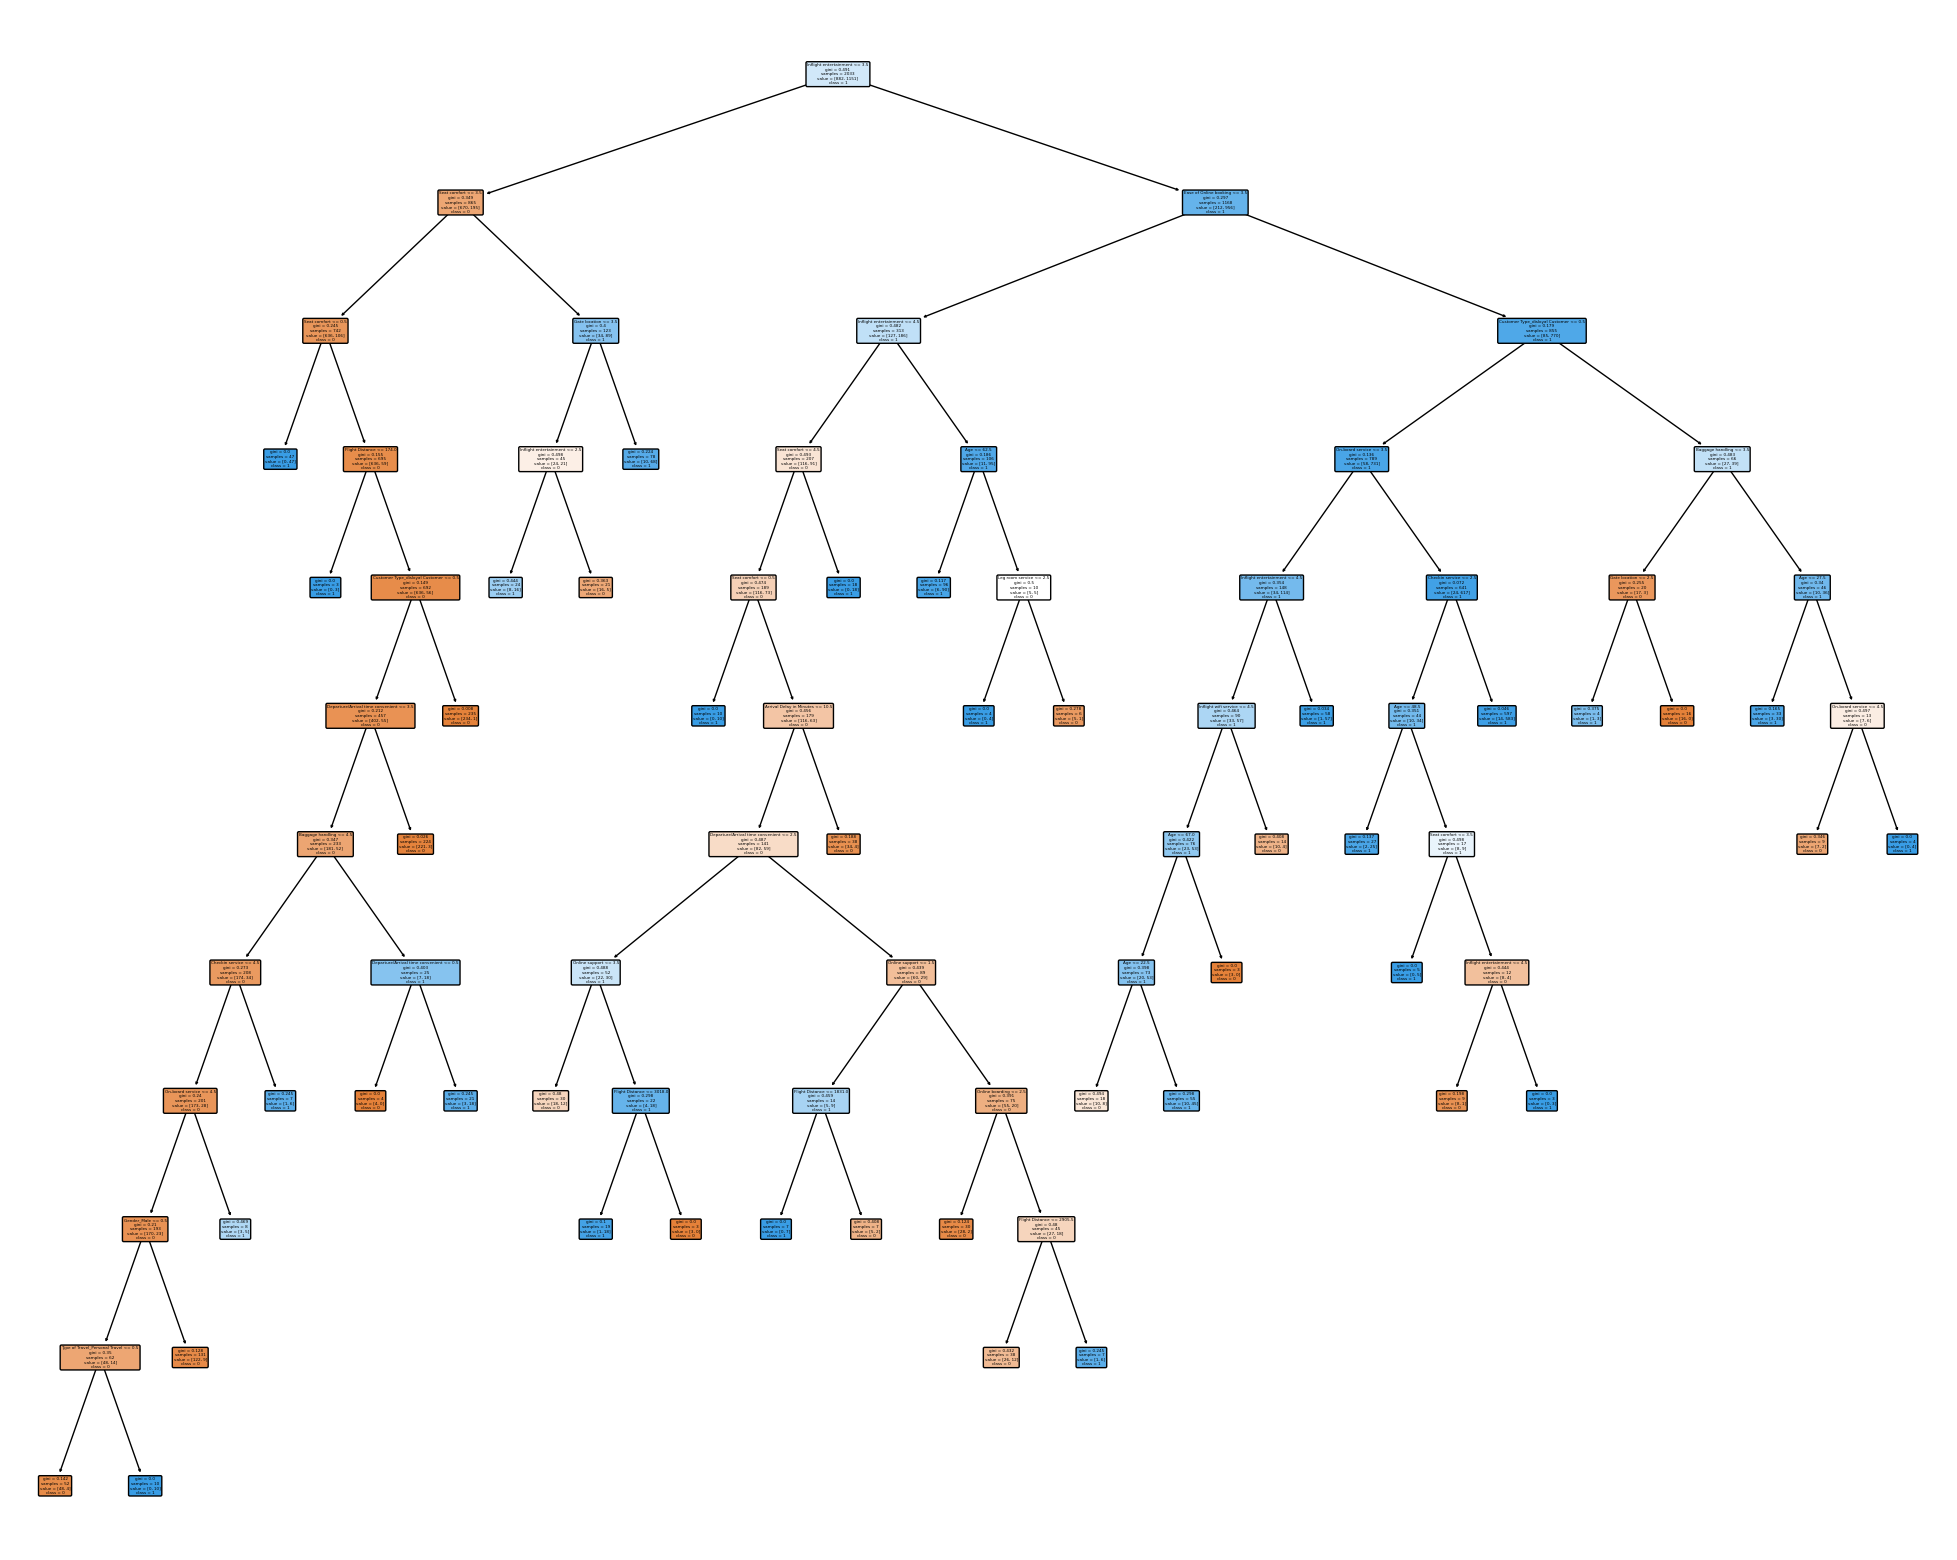

In [351]:
best_clf = clfs[np.argmax(valid_scores)]

# 가장 test score가 높은 dt를 불러오겠다. 

fig = plt.figure(figsize=(25,20))
_ = plot_tree(best_clf,
              feature_names=airline_input2.columns.values,
              class_names=list(map(str, airline_target2.unique())),
              rounded=True,
              filled=True)

              # 오히려 위에서 본 트리보다 훨씬 단순해짐.
              # 일반화가 잘 되어 복잡한 트리보다 더 좋은 성능을 보인다. 

In [352]:
print(best_clf.tree_.max_depth)
print(clf.tree_.max_depth)

11
0


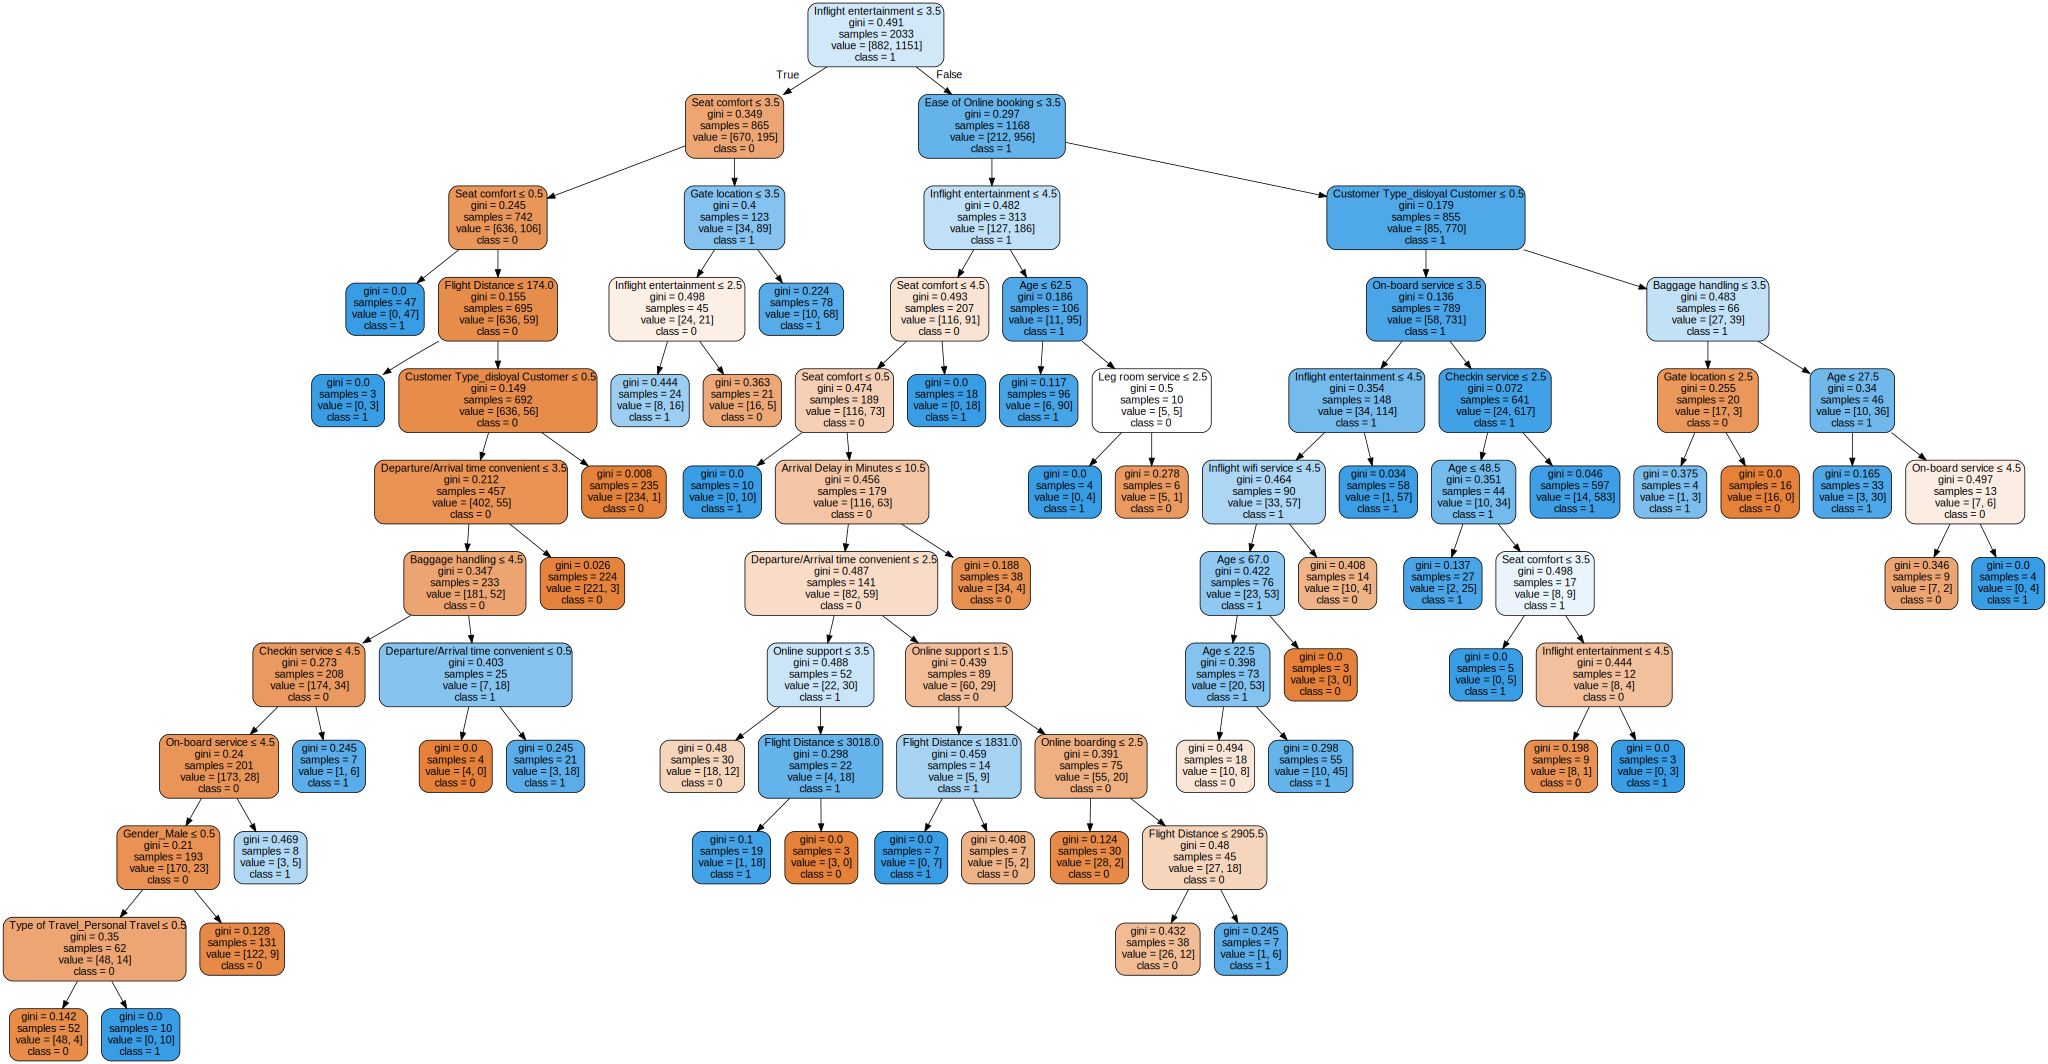

In [353]:
dot_data = export_graphviz(best_clf, 
                           out_file=None,
                           feature_names=airline_input2.columns.values,
                           class_names=list(map(str, airline_target2.unique())),
                           filled=True,
                           rounded=True,
                           special_characters=True) 
graphviz.Source(dot_data)

# 두 가지 방법은 동일. 아무거나 사용할 것

In [354]:
# auroc 비교
y_pred = clf.predict(X_test)
roc = roc_auc_score(y_test, y_pred)

print("ROC AUC:", roc)

ROC AUC: 0.5


In [355]:
# auroc 비교
y_pred = best_clf.predict(X_test)
roc = roc_auc_score(y_test, y_pred)

print("ROC AUC:", roc)

ROC AUC: 0.8636765942381731


In [356]:
# Prediction
CART_post_prey = clf.predict(X_test)
cm = confusion_matrix(y_test, CART_post_prey)
Perf_Table.iloc[1] = perf_eval(cm)
Perf_Table

# 성능이 약간 떨어진듯? 
# depth가 줄어든 것에 만족. test성능은 증가해야 하는거 아닌가?

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,NaN,NaN,NaN,NaN,NaN,NaN
Pre-Pruning,1.0,0.564897,0.0,0.564897,0.0,0.72196


In [357]:
# Prediction
CART_post_prey = best_clf.predict(X_test)
cm = confusion_matrix(y_test, CART_post_prey)
Perf_Table.iloc[0] = perf_eval(cm)
Perf_Table

# 성능이 약간 떨어진듯? 
# depth가 줄어든 것에 만족. test성능은 증가해야 하는거 아닌가?

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,0.879896,0.882199,0.847458,0.865782,0.863524,0.881046
Pre-Pruning,1.0,0.564897,0.0,0.564897,0.0,0.72196


### pre_pruning

In [450]:
# Tree parameter settings
criterion = ["gini", "entropy", "log_loss"] # 총 3가지 존재하므로 3가지 다 비교 
min_split = [10, 30, 50,70,90, 100] # internal node를 split하기 위해 요구되는 최소 node 수
max_depth = [1, 5, 8, 11, 16] # max depth가 16임을 고려

# 파라미터를 바꿔가면서 성능 확인 - grid search를 위해 리스트 설정

param_grid = {
    'criterion': criterion,
    'min_samples_split': min_split,
    'max_depth': max_depth
}

In [451]:


# Fit the decision tree model and evaluate the results
model = DecisionTreeClassifier(random_state=12345)
grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', refit=True)
grid.fit(X_train, y_train)

# Find the best set of parameters
best_criterion = grid.best_params_['criterion']
best_split = grid.best_params_['min_samples_split']
best_depth = grid.best_params_['max_depth']

print("Best criterion:", best_criterion)
print("Best min_samples_split:", best_split)
print("Best max_depth:", best_depth)

# Evaluate the best model on the validation data
y_pred = grid.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
roc = roc_auc_score(y_valid, y_pred)

# Print results
print("Confusion matrix:\n", cm)
print("ROC AUC:", roc)

# 가장 좋았을 때의 세팅. 

Best criterion: gini
Best min_samples_split: 70
Best max_depth: 11
Confusion matrix:
 [[245  49]
 [ 49 335]]
ROC AUC: 0.8528645833333335


In [452]:
model2 = DecisionTreeClassifier(random_state=12345, criterion = 'gini',min_samples_split = 100,max_depth = 8)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=100, random_state=12345)

In [447]:
X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
8266,32.00,0,0,39.50,4.0,130,0,1,0,0,0,0
2412,7.00,0,0,13.33,6.1,140,1,0,0,0,0,0
799,1.24,0,0,18.42,4.0,126,1,0,0,0,1,0
2648,7.00,0,0,13.71,5.8,159,0,0,0,0,0,0
9505,55.00,0,0,33.00,4.5,158,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1246,14.00,0,0,23.90,4.0,140,1,0,0,0,1,0
539,18.00,0,0,21.15,4.0,159,0,0,0,0,0,0
4413,58.00,0,0,19.08,6.5,140,0,0,0,0,0,0
9413,26.00,0,0,21.24,5.0,140,0,0,0,0,1,0


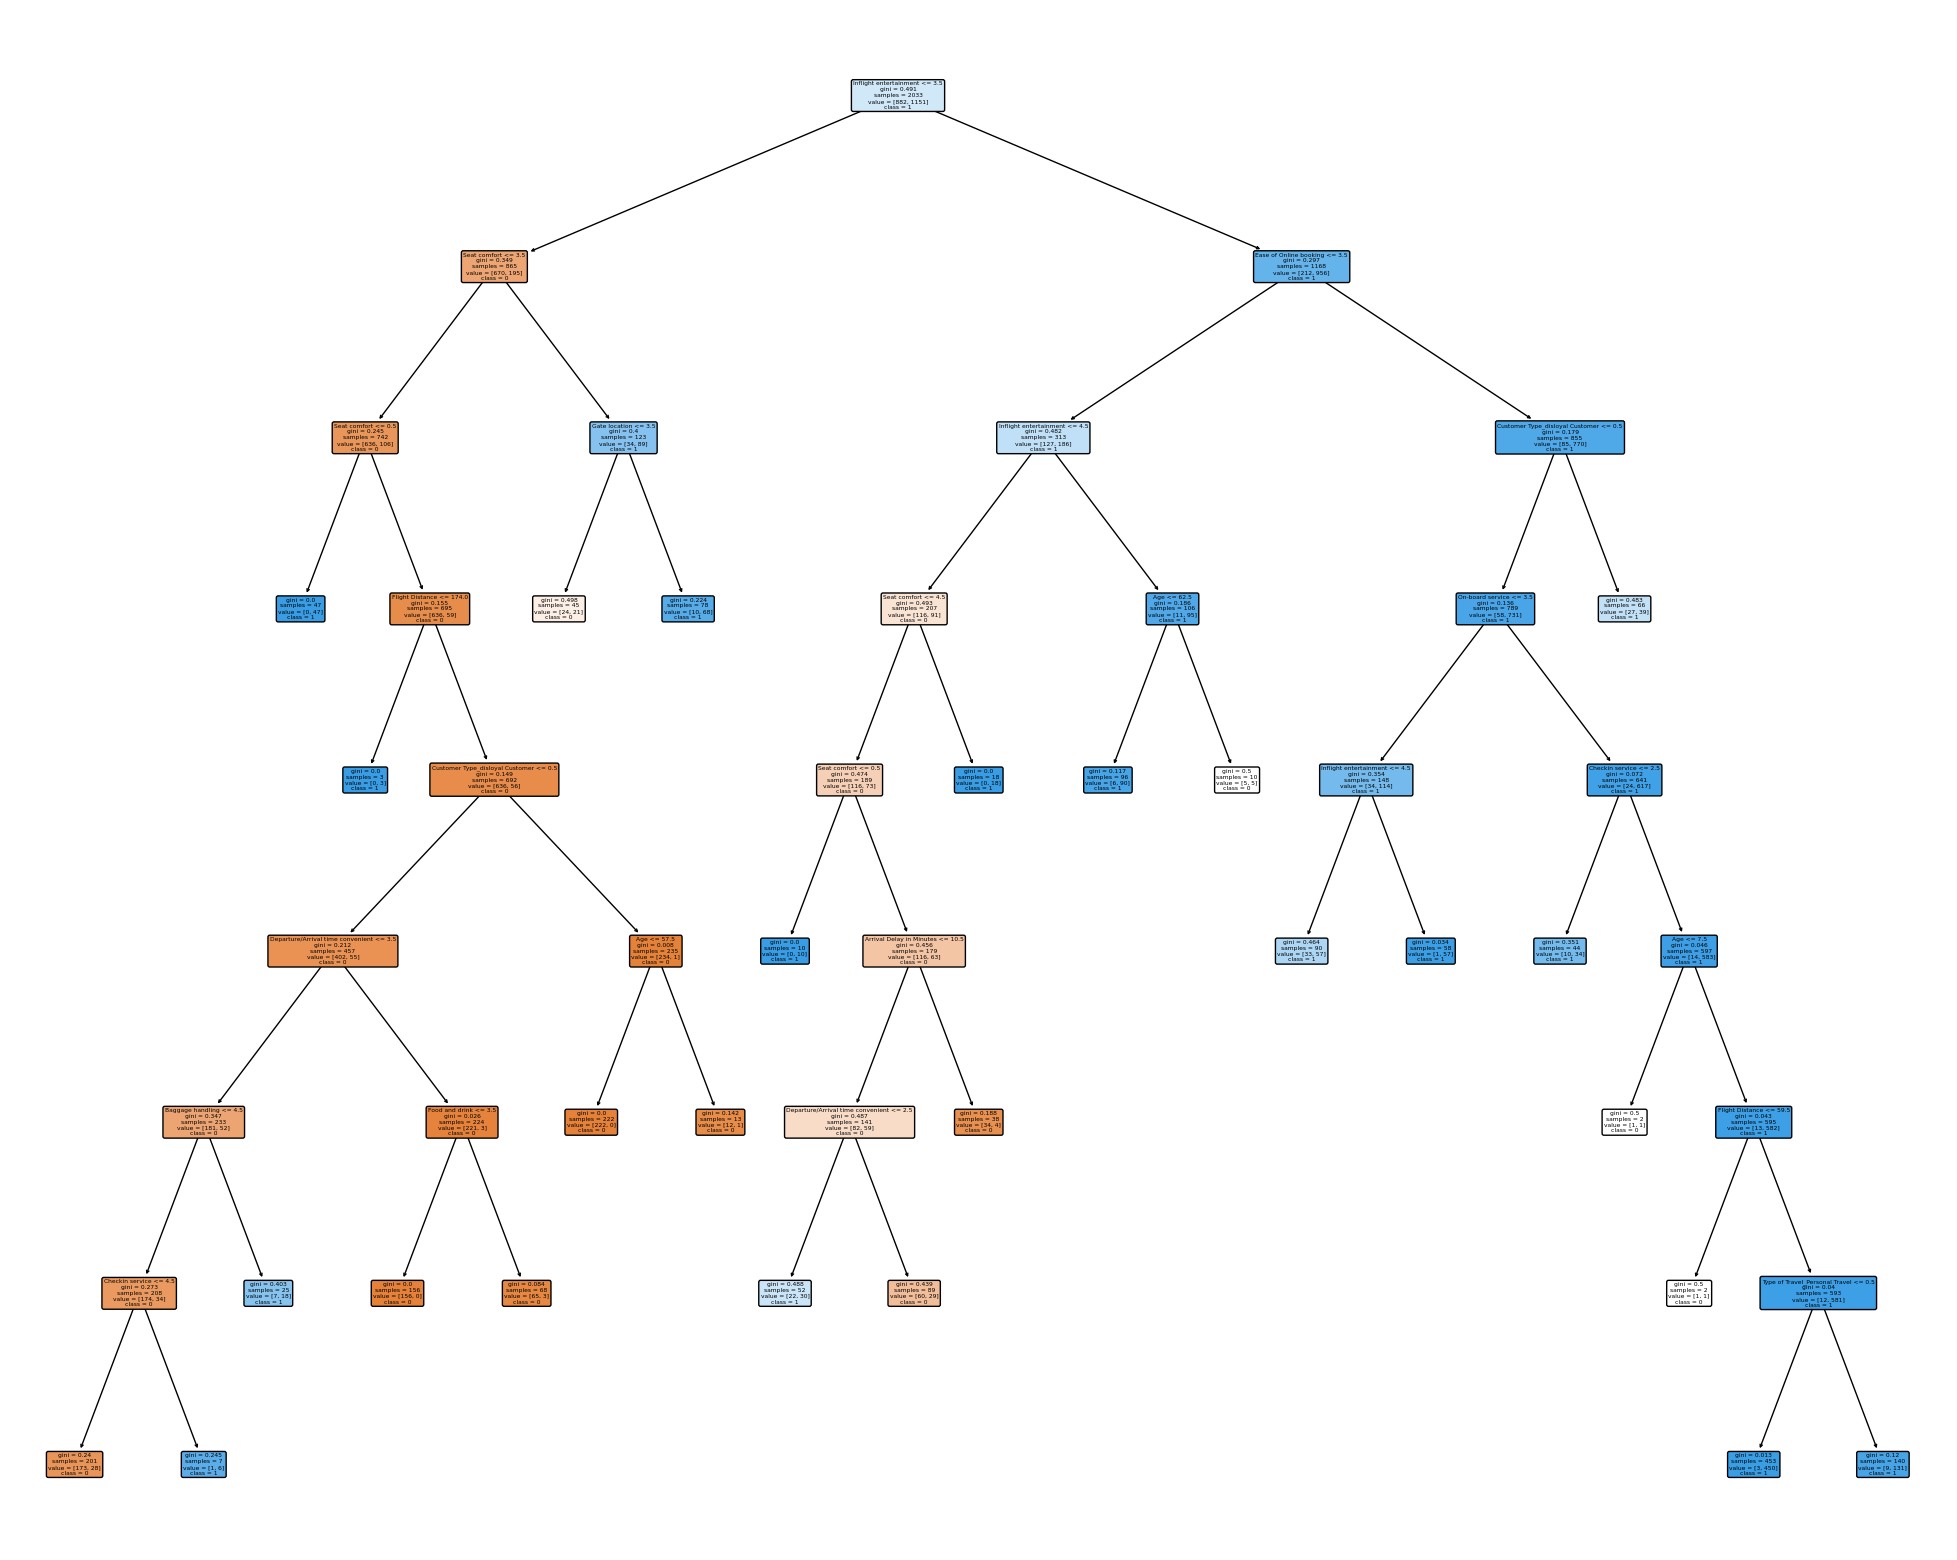

In [453]:
# best_clf = clfs[np.argmax(valid_scores)]

# # 가장 test score가 높은 dt를 불러오겠다. 



fig = plt.figure(figsize=(25,20))
_ = plot_tree(model2,
              feature_names=airline_input2.columns.values,
              class_names=list(map(str, airline_target2.unique())),
              rounded=True,
              filled=True)

              # 오히려 위에서 본 트리보다 훨씬 단순해짐.
              # 일반화가 잘 되어 복잡한 트리보다 더 좋은 성능을 보인다. 

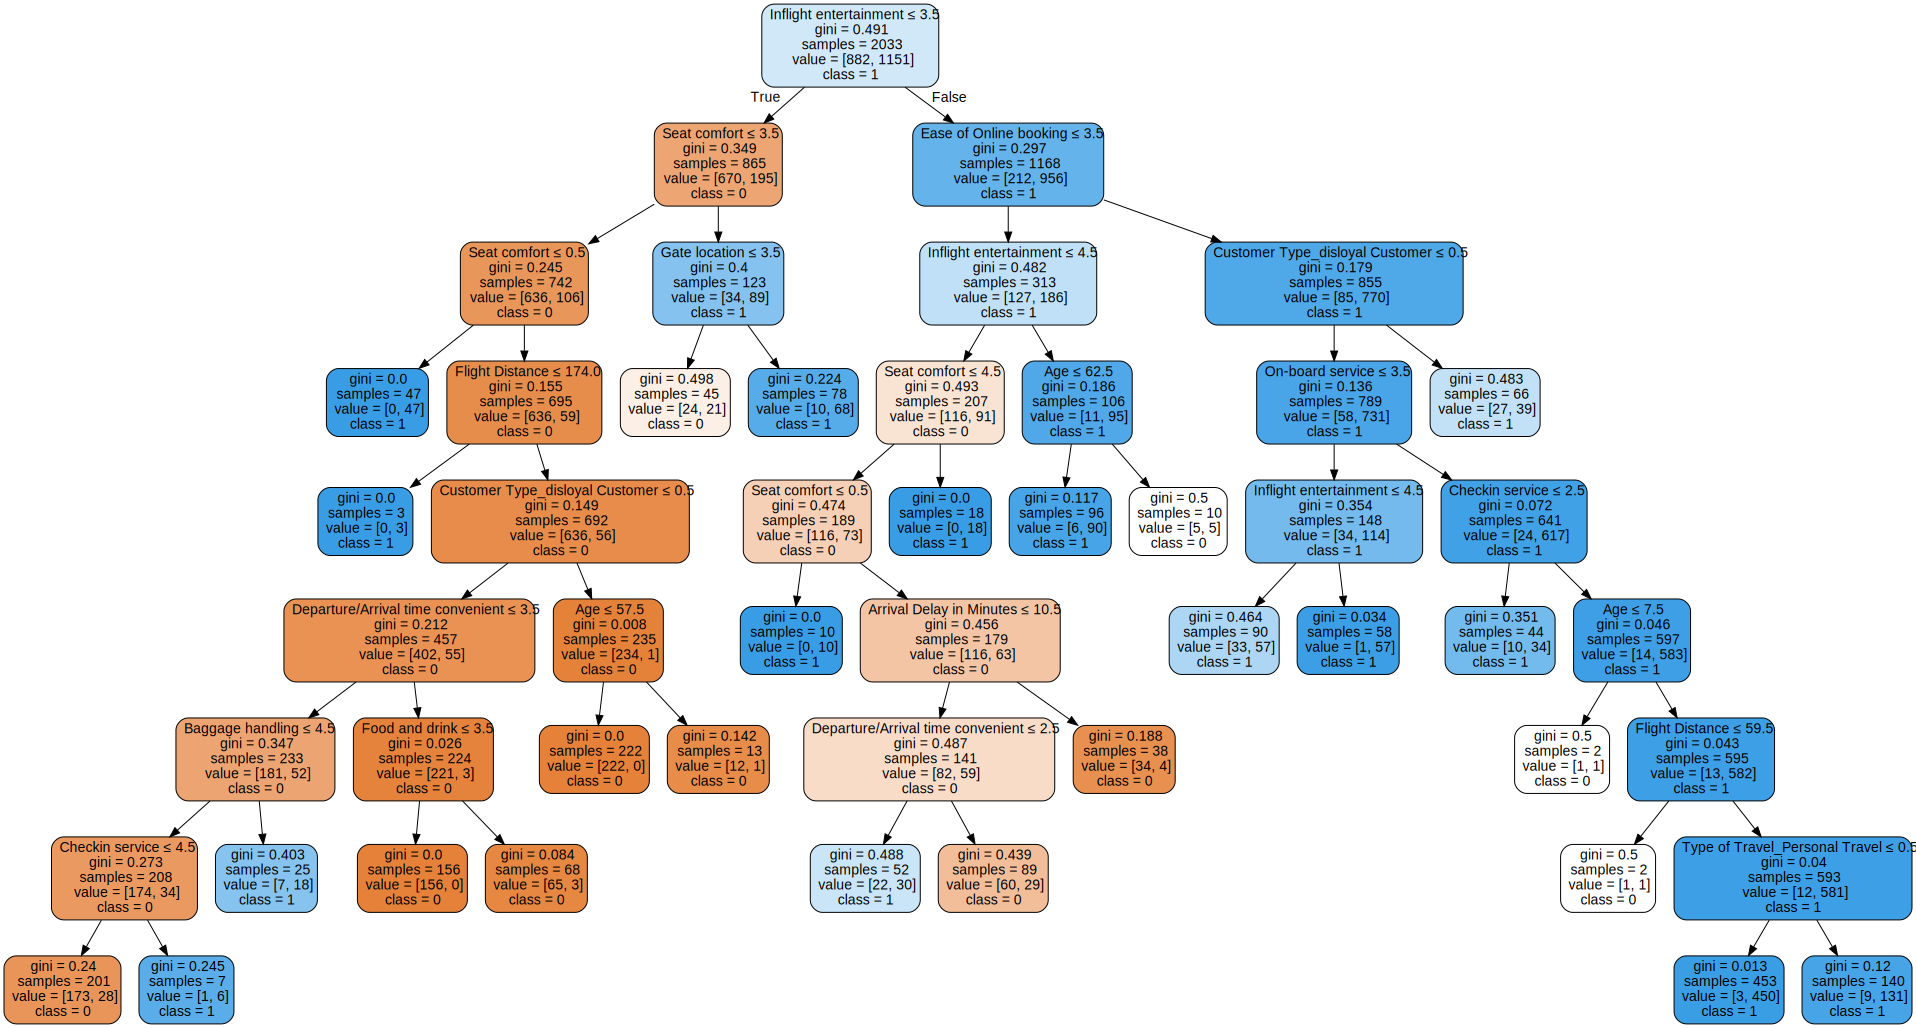

In [454]:
dot_data = export_graphviz(model2, 
                           out_file=None,
                           feature_names=airline_input2.columns.values,
                           class_names=list(map(str, airline_target2.unique())),
                           filled=True,
                           rounded=True,
                           special_characters=True) 
graphviz.Source(dot_data)

# 두 가지 방법은 동일. 아무거나 사용할 것

In [360]:
# Prediction
CART_pre_prediction = grid.predict(X_test)
cm = confusion_matrix(y_test, CART_pre_prediction)
Perf_Table.iloc[1] = perf_eval(cm)
Perf_Table

# 성능은 post pruning 이 pre puring보다 더 좋네요.

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,0.879896,0.882199,0.847458,0.865782,0.863524,0.881046
Pre-Pruning,0.86423,0.882667,0.850847,0.858407,0.857513,0.873351


In [361]:
clf

DecisionTreeClassifier(ccp_alpha=0.17195345462524048, random_state=12345)

In [362]:
# auroc 비교
y_pred = grid.predict(X_test)
roc = roc_auc_score(y_test, y_pred)

print("ROC AUC:", roc)

ROC AUC: 0.8575386113200868


In [363]:
'''

위 지표를 비교하는게 아님.


'''

'\n\n위 지표를 비교하는게 아님.\n\n\n'

## 6. NN vs logistic

In [364]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings(action='ignore')

In [365]:
# Performance evaluation function for multi-class classification ----------
def perf_eval_multi(cm):
  # Simple Accuracy
  ACC = np.trace(cm) / np.sum(cm)
  
  # Balanced Correction Rate
  BCR = np.power(np.prod(np.diag(cm) / np.sum(cm, axis=1)), 1/cm.shape[0])
  
  return ACC, BCR

  # 성능 지표 출력

In [366]:
# Initialize performance matrix
perf_summary = pd.DataFrame(index=["Multi_Logit", "ANN"], 
                            columns = ["ACC", "BCR"])
perf_summary

# non으로 채운 데이터프레임 생성

# 다항로지스틱회귀 

,ACC,BCR
Multi_Logit,NaN,NaN
ANN,NaN,NaN


In [367]:
# Multinomial logistic regression
ml_logit = LogisticRegression(multi_class='multinomial', solver='newton-cg')
ml_logit.fit(X_train, y_train)

# LR 돌리기

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [368]:
# Check the coefficients
print(ml_logit.coef_)

# 해석하려면 다른게 필요할수도 있고,, p-value를 먼저 확인해봐야 할 듯?

[[-3.15130285e-03 -5.18182288e-05  1.41302463e-01 -1.01406150e-01
  -1.16739643e-01  4.93225856e-02 -7.54873154e-02  3.52070143e-01
   5.80438016e-03  1.26957991e-01  1.93060804e-01  9.51333505e-02
   6.27327496e-02  1.79203216e-01 -6.58378275e-02  1.11528937e-01
  -3.92270639e-03 -1.24276643e-02 -4.72596891e-01 -1.02858407e+00
  -2.37554076e-01 -4.36497537e-01 -3.01052081e-01]]


In [369]:
# Predict the class label
ml_logit_prey = ml_logit.predict(X_test)

# Calculate performance using confusion matrix
cfmatrix = confusion_matrix(y_test, ml_logit_prey)

perf_summary.iloc[0] = perf_eval_multi(cfmatrix)
perf_summary

,ACC,BCR
Multi_Logit,0.834808,0.829731
ANN,NaN,NaN


In [370]:
# Artificial Neural Network
# Train ANN
ann_trn_input = X_train
ann_trn_target = np.array(y_train.values)   # 1,2이므로 0,1로 바꿈
ann_trn_target

array([1, 0, 1, ..., 1, 1, 1])

In [371]:
# Tree parameter settings
criterion = ["logistic", "tanh", "relu"] # 총 3가지 존재하므로 3가지 다 비교 
hidden_layer = [3, 6, 9, 12, 18, 21, 26, 30] # internal node를 split하기 위해 요구되는 최소 node 수
max_iteration = [100, 300, 500] # 반복 수 

# 파라미터를 바꿔가면서 성능 확인 - grid search를 위해 리스트 설정

param_grid = {
    'activation': criterion,
    'hidden_layer_sizes': hidden_layer,
    'max_iter': max_iteration
}

# Fit the decision tree model and evaluate the results
model = MLPClassifier()
grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', refit=True)
grid.fit(X_train, y_train)

# Find the best set of parameters
best_criterion = grid.best_params_['activation']
hidden_layer = grid.best_params_['hidden_layer_sizes']
max_iter = grid.best_params_['max_iter']

print("Best activation:", best_criterion)
print("Best hidden_layer_sizes:", hidden_layer)
print("Best max_iter:", max_iter)

# Evaluate the best model on the validation data
y_pred = grid.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
roc = roc_auc_score(y_valid, y_pred)

# Print results
print("Confusion matrix:\n", cm)
print("ROC AUC:", roc)

# 가장 좋았을 때의 세팅. 

Best activation: logistic
Best hidden_layer_sizes: 9
Best max_iter: 300
Confusion matrix:
 [[224  70]
 [ 49 335]]
ROC AUC: 0.8171502976190477


In [372]:
# Prediction
CART_pre_prediction = grid.predict(X_test)
cm = confusion_matrix(y_test, CART_pre_prediction)
Perf_Table.iloc[1] = perf_eval(cm)
Perf_Table

# 성능은 post pruning 이 pre puring보다 더 좋네요.

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,0.879896,0.882199,0.847458,0.865782,0.863524,0.881046
Pre-Pruning,0.843342,0.838961,0.789831,0.820059,0.816148,0.841146


## 8번. 새로운 데이터 가져와서 이유 

9번. 새로운 데이터로 똑같이 모델링 진행

## 10번. 새로운 데이터에 대해 최문제

# all


## 1번 데이터셋 선정이유와 split 비율 설명하기

In [373]:
'''

breast_cancer.csv를 선택했다. 

예측정확도가 예측 결과물에 대한 해석보다 훨씬 더 중요할 것으로 생각되는 분류문제를 찾을 때
예측 결과물에 대한 해석이 필요없는 데이터셋을 찾으려 했다. 하지만 결국 분류가 수행되면 왜 그렇게 분류되었는지를
확인한다면 예측 결과물에 대한 해석이 가능하고 또 의미가 없을 수는 없었다. 
그래서 예측 정확도만 고려하여 예측 정확도가 높으면 높을수록 좋고, 예측을 잘못했을 때 리스크가 큰 데이터를 선정했다.

breast_cancer는 유방암 예측 데이터셋이다. 특성들을 통해 유방암 여부를 예측하는 것이고 잘못 예측했을 때 비용이
상대적으로 다른 분류문제보다 크기 때문에 예측 정확도가 매우 중요할 것이라고 해석했다. 



'''

'\n\nbreast_cancer.csv를 선택했다. \n\n예측정확도가 예측 결과물에 대한 해석보다 훨씬 더 중요할 것으로 생각되는 분류문제를 찾을 때\n예측 결과물에 대한 해석이 필요없는 데이터셋을 찾으려 했다. 하지만 결국 분류가 수행되면 왜 그렇게 분류되었는지를\n확인한다면 예측 결과물에 대한 해석이 가능하고 또 의미가 없을 수는 없었다. \n그래서 예측 정확도만 고려하여 예측 정확도가 높으면 높을수록 좋고, 예측을 잘못했을 때 리스크가 큰 데이터를 선정했다.\n\nbreast_cancer는 유방암 예측 데이터셋이다. 특성들을 통해 유방암 여부를 예측하는 것이고 잘못 예측했을 때 비용이\n상대적으로 다른 분류문제보다 크기 때문에 예측 정확도가 매우 중요할 것이라고 해석했다. \n\n\n\n'

## 데이터 호출 및 기초 전처리

이상치 제거

원핫인코딩 drop first

null포함 행 제거

In [374]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [375]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 통계 학습을 위한 패키지
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 기계 학습을 위한 패키지
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

In [376]:
cancer = pd.read_csv("/content/drive/MyDrive/data_sample/diabetes_prediction_dataset.csv")
cancer

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [377]:
# null 행 제거
cancer = cancer.dropna(axis=0)
cancer.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [378]:
# 이상치 제거
Q1 = cancer[["age","bmi","HbA1c_level","blood_glucose_level"]].quantile(q=0.25)
Q3 = cancer[["age","bmi","HbA1c_level","blood_glucose_level"]].quantile(q=0.75)
IQR = Q3-Q1
IQR_df2 = cancer[(cancer["age"] <= Q3['age']+1.5*IQR['age']) & (cancer["age"] >= Q1['age']-1.5*IQR['age'])]
IQR_df2 = cancer[(cancer["bmi"] <= Q3['bmi']+1.5*IQR['bmi']) & (cancer['bmi'] >= Q1['bmi']-1.5*IQR['bmi'])]
IQR_df2 = cancer[(cancer["HbA1c_level"] <= Q3['HbA1c_level']+1.5*IQR['HbA1c_level']) & (cancer["HbA1c_level"] >= Q1['HbA1c_level']-1.5*IQR['HbA1c_level'])]
IQR_df2 = cancer[(cancer["blood_glucose_level"] <= Q3['blood_glucose_level']+1.5*IQR['blood_glucose_level']) & (cancer['blood_glucose_level'] >= Q1['blood_glucose_level']-1.5*IQR['blood_glucose_level'])]
print('original_df :', len(cancer))
print('IQR_df :', len(IQR_df2))

original_df : 100000
IQR_df : 97962


In [379]:
IQR_df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [380]:
cancer_df =IQR_df2[:10000]
cancer_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
10215,Male,70.0,0,1,never,27.32,5.7,200,1
10216,Female,31.0,0,0,No Info,27.32,5.8,100,0
10217,Male,56.0,1,0,never,49.18,7.0,155,1
10218,Female,35.0,0,0,not current,22.94,6.2,145,0


In [381]:
cancer_df['diabetes'].value_counts()

IQR_df2['diabetes'].value_counts()

0    91500
1     6462
Name: diabetes, dtype: int64

In [382]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [383]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

import graphviz 

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [384]:
# Performance Evaluation Function ------------------------------------------------
def perf_eval(cm):
    _tp = cm[1, 1]
    _fn = cm[1, 0]
    _fp = cm[0, 1]
    _tn = cm[0, 0]

    # True positive rate: TPR (Recall)
    TPR = _tp / (_tp + _fn)
    # Precision
    PRE = _tp/(_tp+_fp)
    # True negative rate: TNR
    TNR = _tn/(_tn+_fp)
    # Simple Accuracy
    ACC = (_tp + _tn) / np.sum(cm)
    # Balanced Correction Rate
    BCR = np.sqrt(TPR*TNR)
    # F1-Measure
    F1 = 2*TPR*PRE/(TPR+PRE)
    
    return TPR, PRE, TNR, ACC, BCR, F1

In [385]:
# Performance table
Perf_Table = pd.DataFrame(index=["Post-Pruning", "Pre-Pruning"],
                          columns = ["TPR", "Precision", "TNR", 
                                     "Accuracy", "BCR", "F1-Measure"])

In [386]:
Perf_Table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,NaN,NaN,NaN,NaN,NaN,NaN
Pre-Pruning,NaN,NaN,NaN,NaN,NaN,NaN


In [387]:
# Load the data & Preprocessing
# Ploan = pd.read_csv("Personal Loan.csv")
columns = cancer_df.columns.values
input_idx = [0,1, 2, 3,4, 5, 6, 7]
target_idx = 8

cancer_input = cancer_df[columns[input_idx]]
cancer_target = cancer_df[columns[target_idx]]

In [388]:
cancer_input

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
10215,Male,70.0,0,1,never,27.32,5.7,200
10216,Female,31.0,0,0,No Info,27.32,5.8,100
10217,Male,56.0,1,0,never,49.18,7.0,155
10218,Female,35.0,0,0,not current,22.94,6.2,145


In [389]:
cancer_target

0        0
1        0
2        0
3        0
4        0
        ..
10215    1
10216    0
10217    1
10218    0
10219    0
Name: diabetes, Length: 10000, dtype: int64

In [390]:
# reset index

cancer_input = cancer_input.reset_index(drop=True)
cancer_target = cancer_target.reset_index(drop=True)
cancer_target

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    1
9998    0
9999    0
Name: diabetes, Length: 10000, dtype: int64

In [391]:
cancer_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               10000 non-null  object 
 1   age                  10000 non-null  float64
 2   hypertension         10000 non-null  int64  
 3   heart_disease        10000 non-null  int64  
 4   smoking_history      10000 non-null  object 
 5   bmi                  10000 non-null  float64
 6   HbA1c_level          10000 non-null  float64
 7   blood_glucose_level  10000 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [392]:
# airline_target2 = airline_target.astype('int64')
# airline_target2

In [393]:
cancer_input['gender'].unique()
cancer_input['smoking_history'].unique()


array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [394]:
# one hot encoding 진행

cancer_input2 = pd.get_dummies(cancer_input, columns=['gender','smoking_history'],drop_first=True)
cancer_input2


# array(['Female', 'Male']
# ['never', 'No Info', 'current', 'former', 'ever', 'not current']

# drop_first를 통해 4개 column만 추가됨


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,1,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70.0,0,1,27.32,5.7,200,1,0,0,0,1,0
9996,31.0,0,0,27.32,5.8,100,0,0,0,0,0,0
9997,56.0,1,0,49.18,7.0,155,1,0,0,0,1,0
9998,35.0,0,0,22.94,6.2,145,0,0,0,0,0,1


In [395]:
X_train, X_test, y_train, y_test = train_test_split(cancer_input2, 
                                                    cancer_target, 
                                                    test_size= 0.4,
                                                    stratify=cancer_target,
                                                    random_state=12345)

In [396]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, 
                                                    y_test, 
                                                    test_size= 0.5,
                                                    stratify=y_test,
                                                    random_state=12345)

In [397]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(6000, 12)
(2000, 12)
(2000, 12)
(6000,)
(2000,)
(2000,)


## 2번 full tree, post pruning tree 만들기



In [398]:
X_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
8266,32.00,0,0,39.50,4.0,130,0,1,0,0,0,0
2412,7.00,0,0,13.33,6.1,140,1,0,0,0,0,0
799,1.24,0,0,18.42,4.0,126,1,0,0,0,1,0
2648,7.00,0,0,13.71,5.8,159,0,0,0,0,0,0
9505,55.00,0,0,33.00,4.5,158,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1246,14.00,0,0,23.90,4.0,140,1,0,0,0,1,0
539,18.00,0,0,21.15,4.0,159,0,0,0,0,0,0
4413,58.00,0,0,19.08,6.5,140,0,0,0,0,0,0
9413,26.00,0,0,21.24,5.0,140,0,0,0,0,1,0


In [399]:
y_train

8266    0
2412    0
799     0
2648    0
9505    0
       ..
1246    0
539     0
4413    0
9413    0
4720    0
Name: diabetes, Length: 6000, dtype: int64

In [400]:
# full tree 만들기

# Classification and Regression Tree (CART) --------------------------------------
# Training the tree
clf = DecisionTreeClassifier(random_state=12345) # parameter를 밖
CART_post = clf.fit(X_train, y_train)

In [401]:
clf.score(X_train, y_train)

# acc = 100%로 오버피팅되었을 확률이 높다.

1.0

In [402]:
clf.score(X_valid, y_valid)

0.9485

In [403]:
clf.score(X_test, y_test)

# acc = 0.976

0.9535

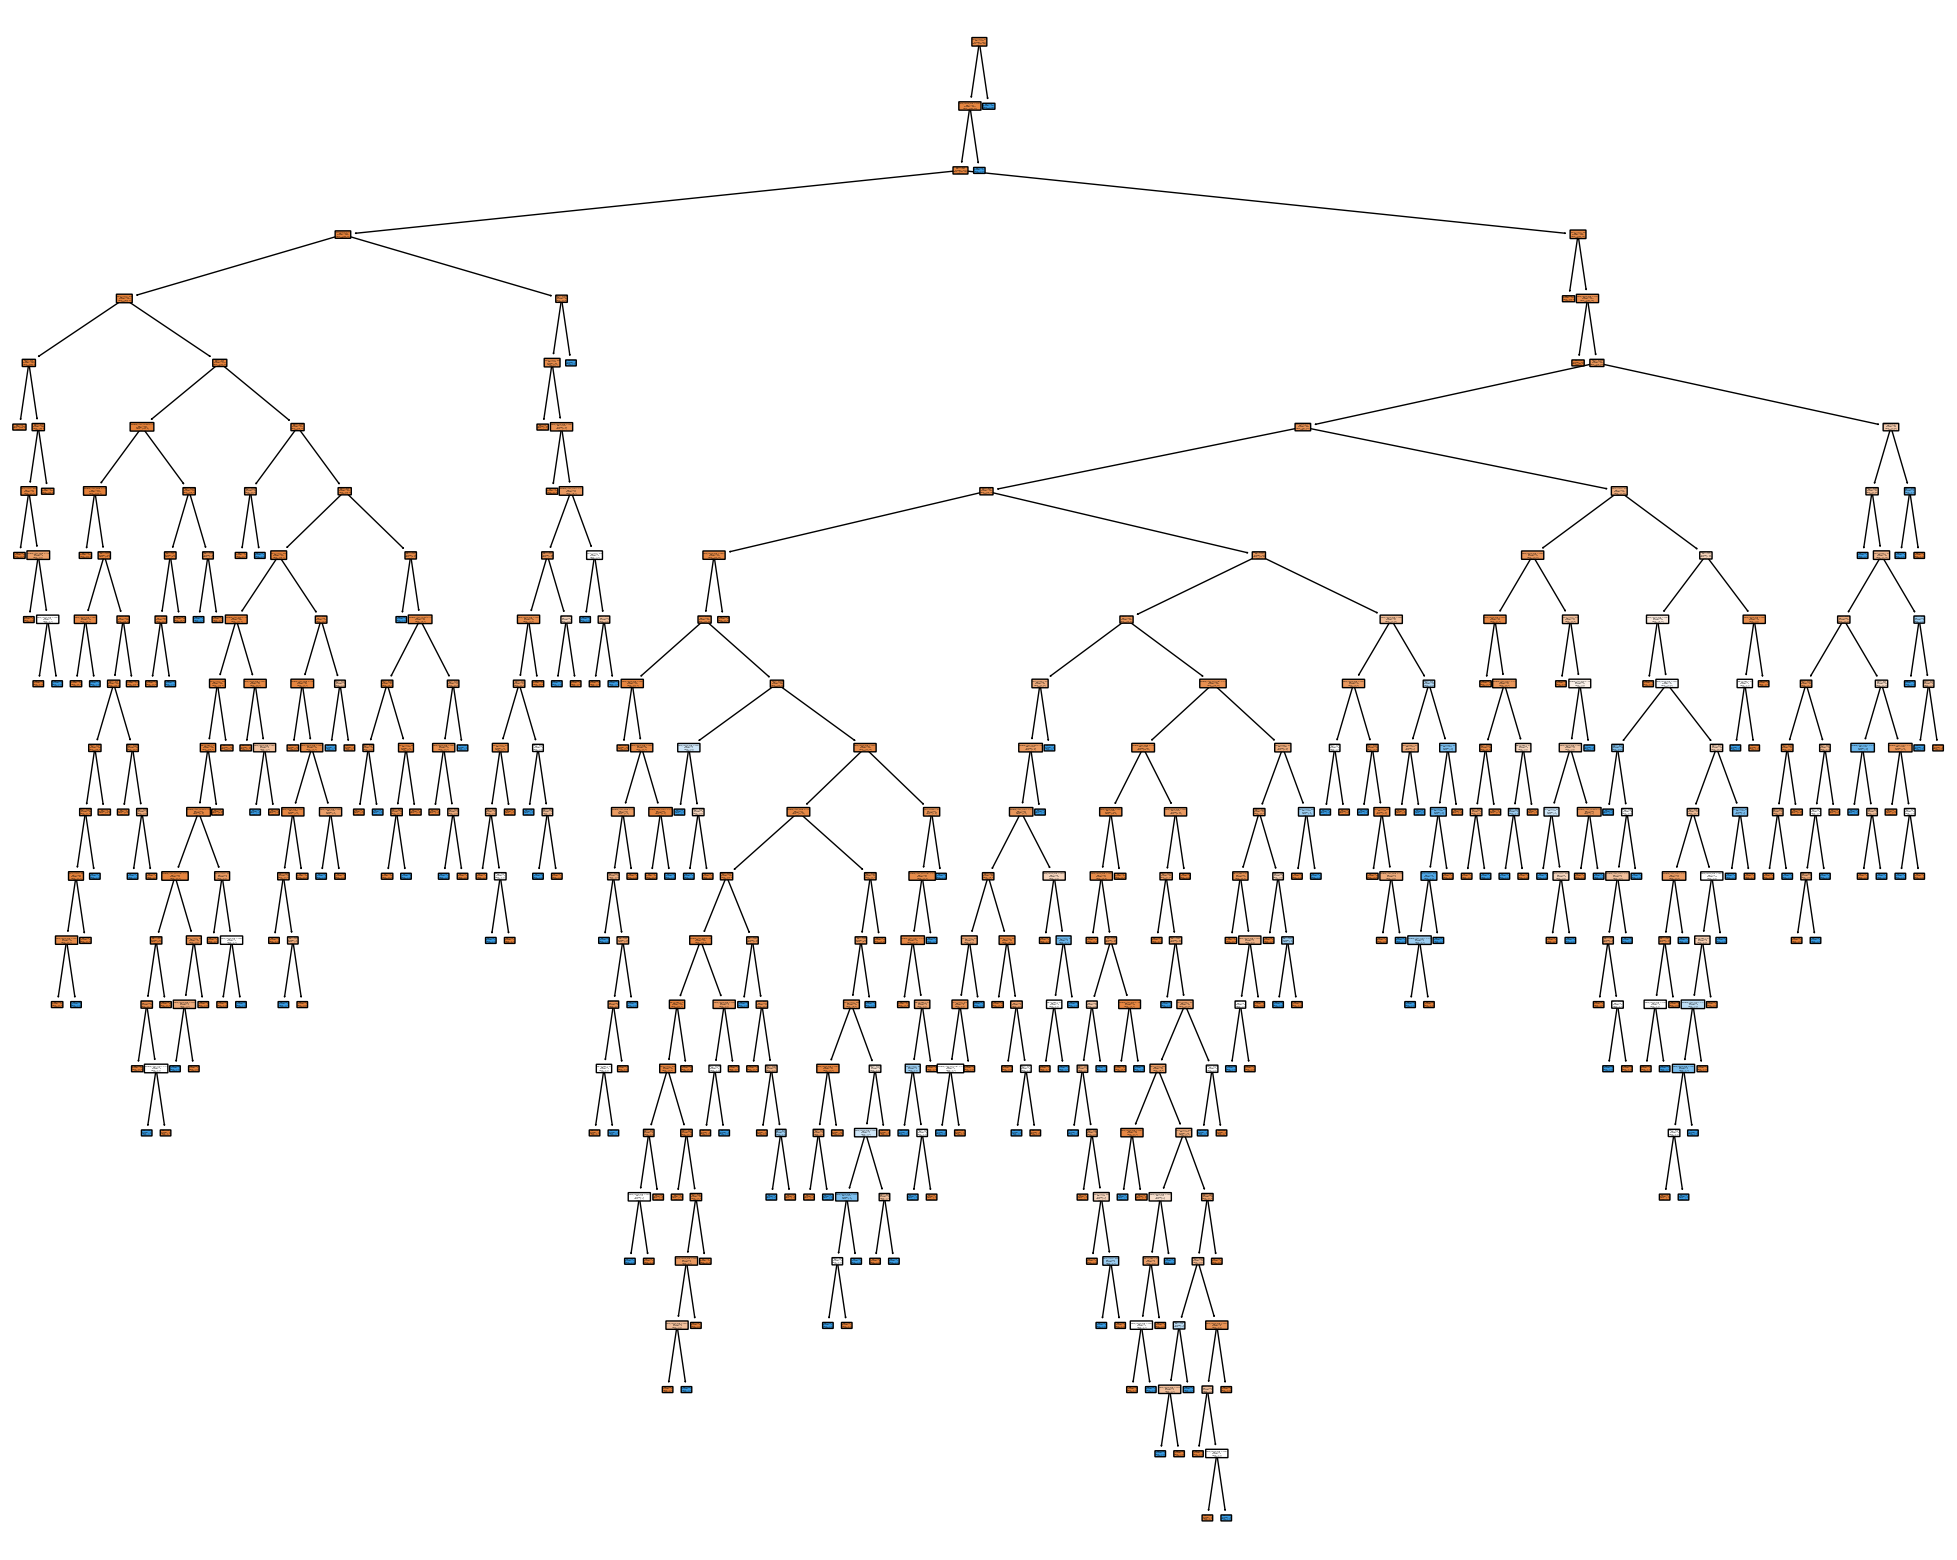

In [404]:
# Plot the tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf,
              feature_names=cancer_input2.columns.values,
              class_names=list(map(str, cancer_target.unique())),
              rounded=True, # 둥글게
              filled=True) # 색상
plt.show()

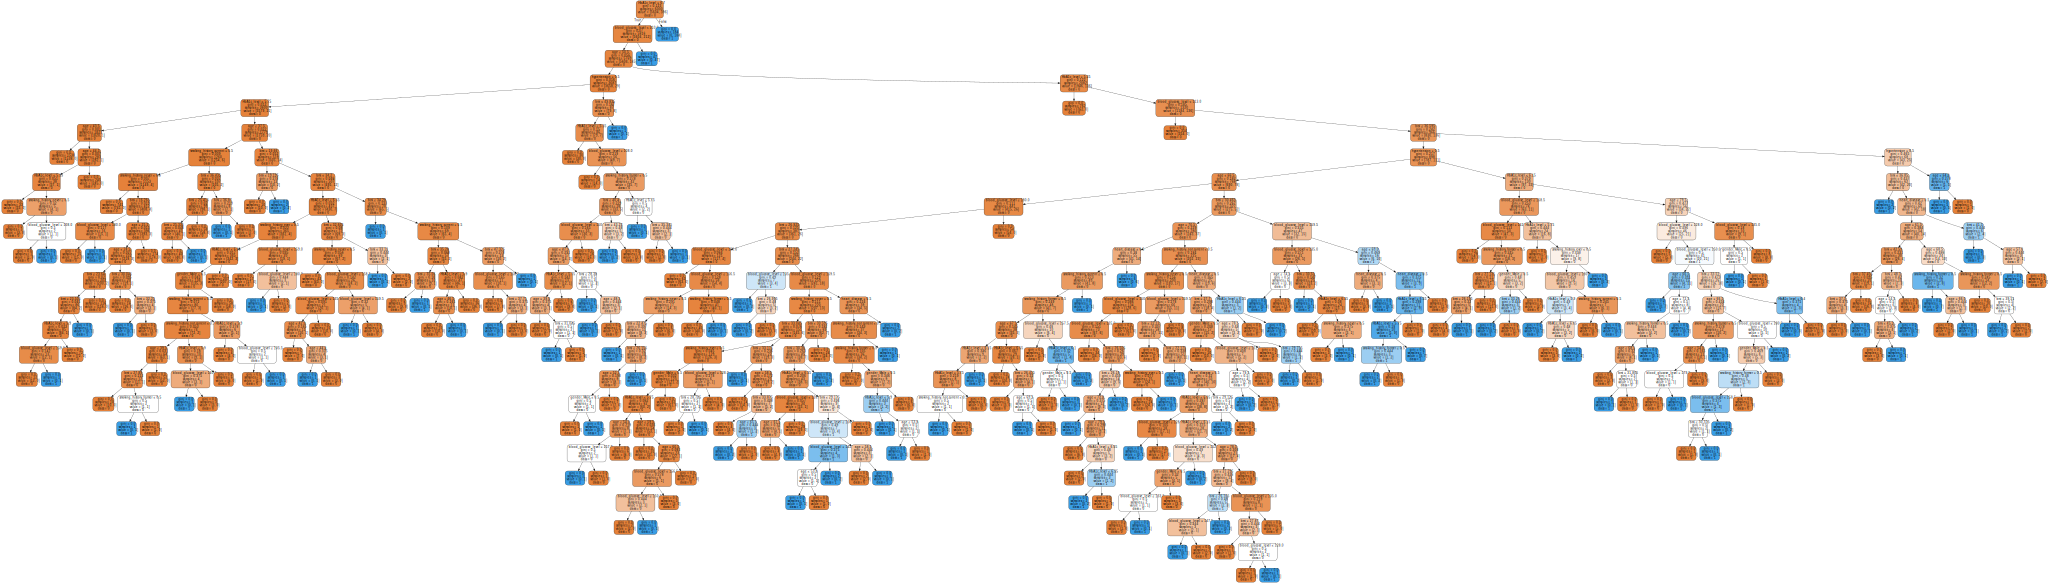

In [405]:

import graphviz 
dot_data = export_graphviz(clf, 
                           out_file=None,
                           feature_names=cancer_input2.columns.values,
                           class_names=list(map(str, cancer_target.unique())),
                           filled=True,
                           rounded=True,
                           special_characters=True) 
graphviz.Source(dot_data)

# 두 가지 방법은 동일. 아무거나 사용할 것

In [406]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

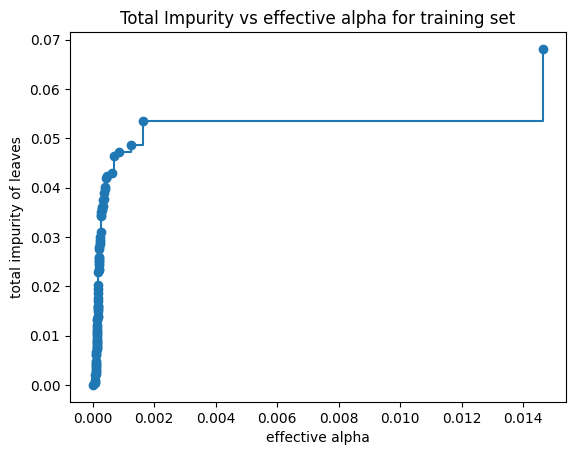

In [407]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [408]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=12345, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

#가장 단순하고 복잡도가 낮은 모델

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05519721595598344


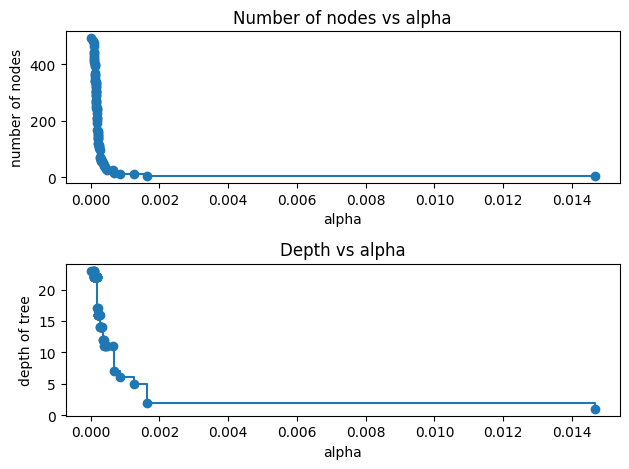

In [409]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

# 알파값이 증가할수록 트리의 구조가 단순해진다. 

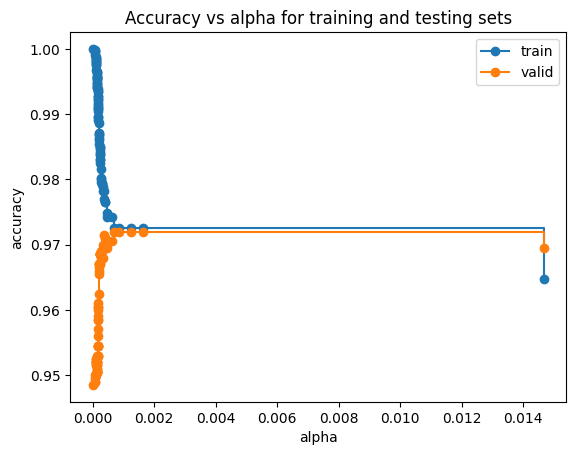

In [410]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker="o", label="valid", drawstyle="steps-post")
ax.legend()
plt.show()


# 초기에는 학습데이터에 오버피팅된 모습을 보임. 알파를 늘릴 때 점차 학습데이터의 오버피팅이 줄어든 모습을 보인다.
# 반대로 오버피팅이 완화되면서 검증데이터의 정확도가 늘어나는 모습을 보입니다. 

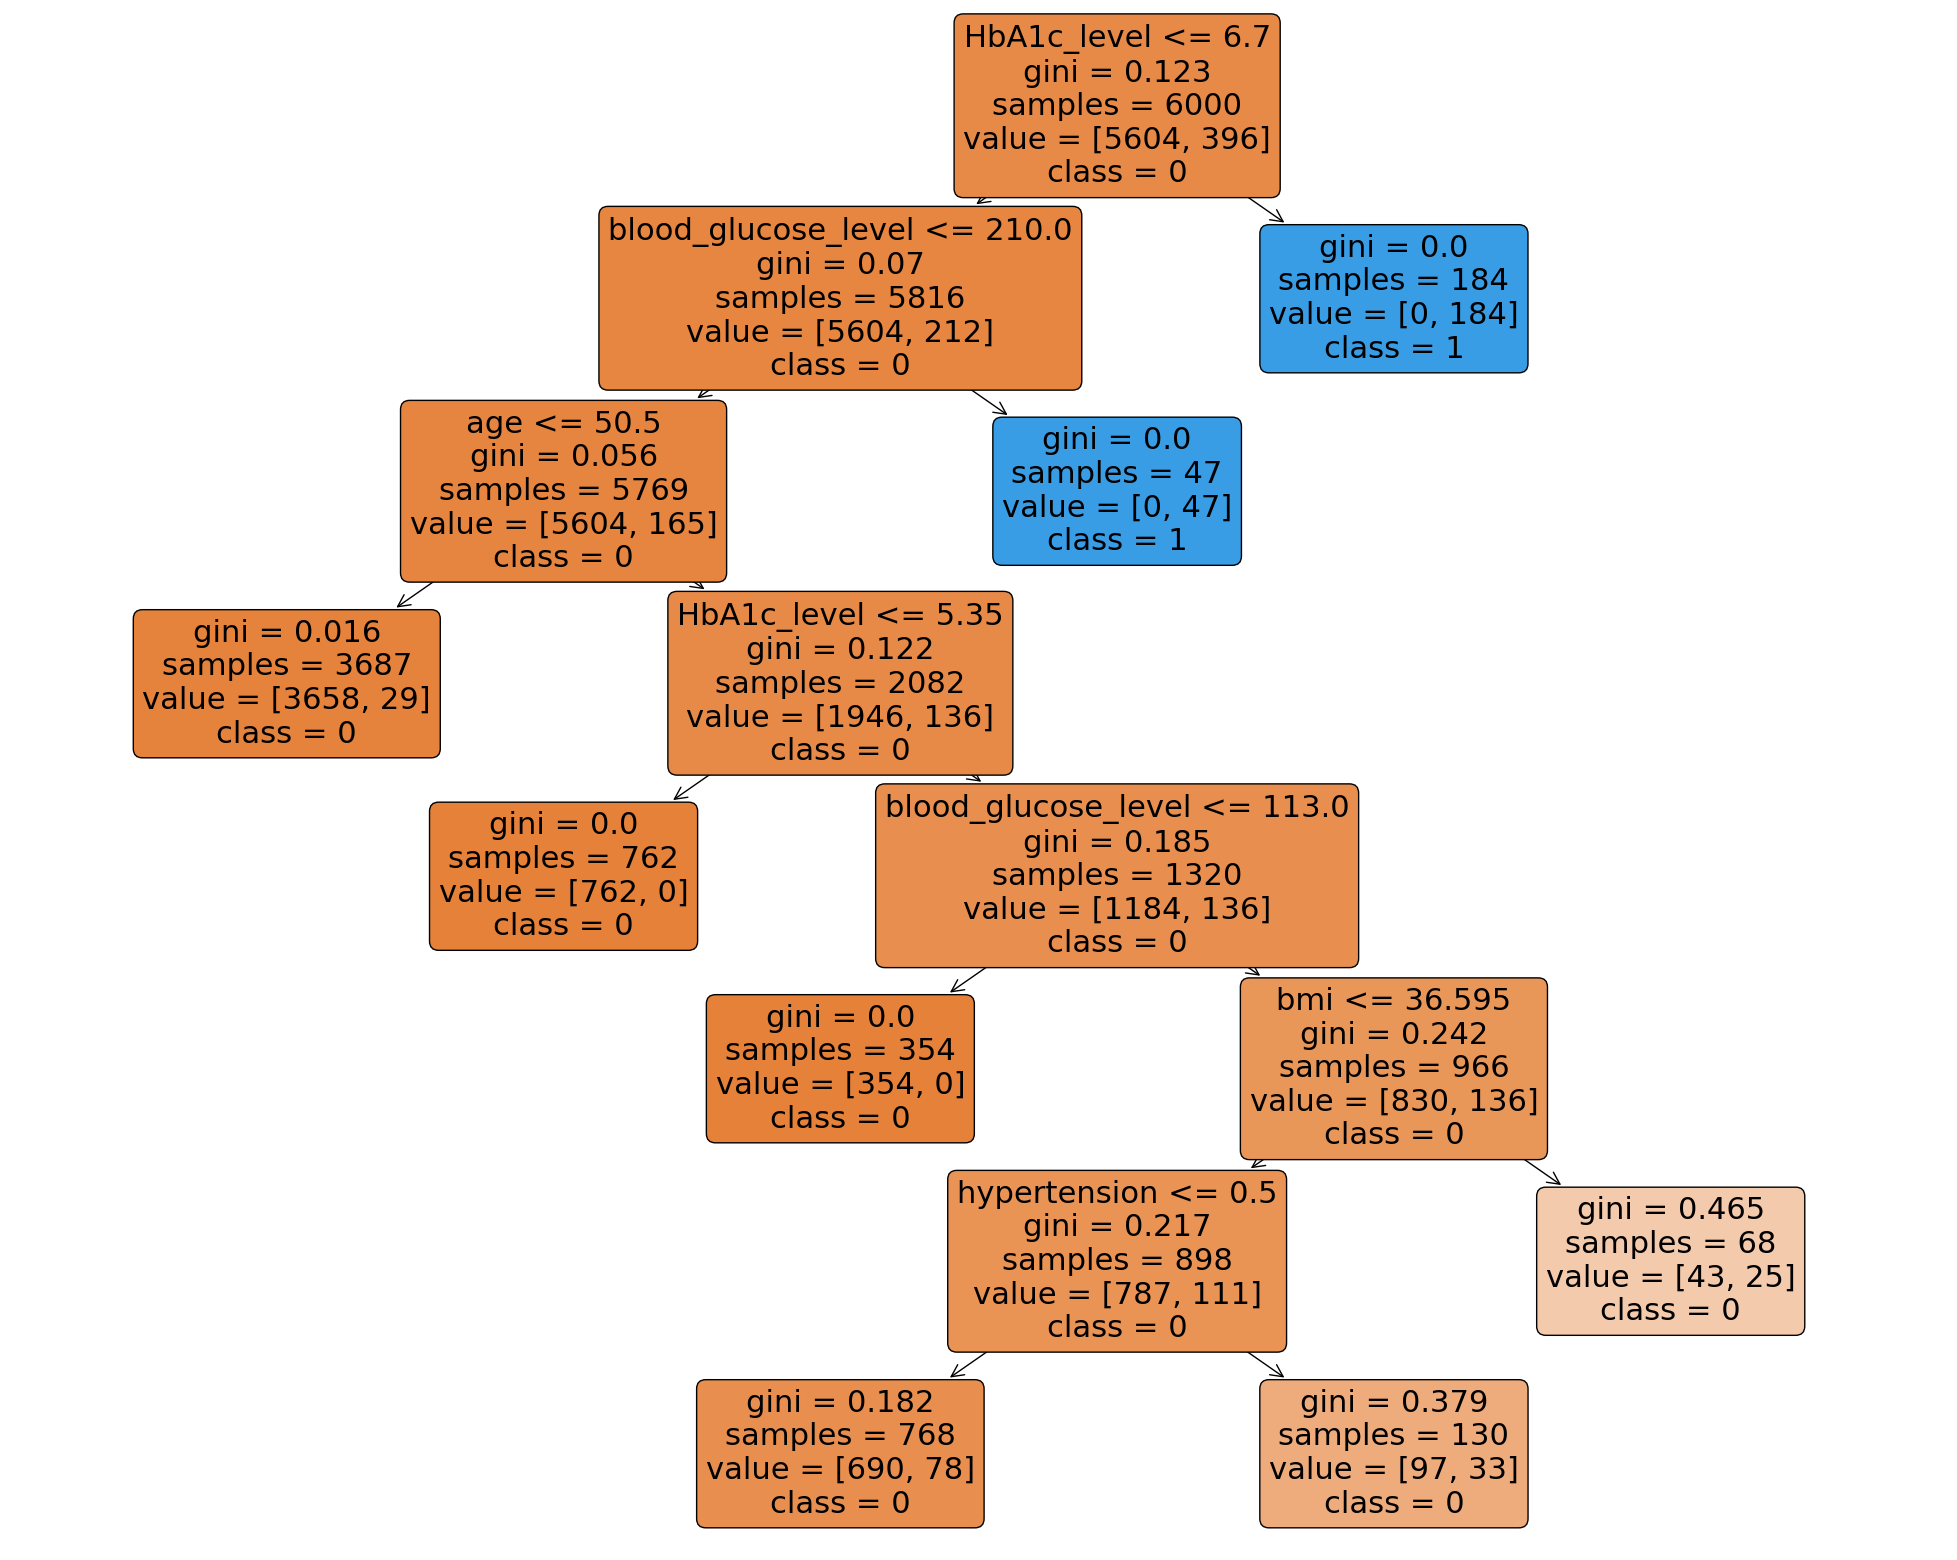

In [411]:
best_clf = clfs[np.argmax(valid_scores)]

# 가장 test score가 높은 dt를 불러오겠다. 

fig = plt.figure(figsize=(25,20))
_ = plot_tree(best_clf,
              feature_names=cancer_input2.columns.values,
              class_names=list(map(str, cancer_target.unique())),
              rounded=True,
              filled=True)

              # 오히려 위에서 본 트리보다 훨씬 단순해짐.
              # 일반화가 잘 되어 복잡한 트리보다 더 좋은 성능을 보인다. 

In [412]:
print(best_clf.tree_.max_depth)
print(clf.tree_.max_depth)

# 풀트리는 23
# post = 7


7
0


In [413]:
dot_data = export_graphviz(best_clf, 
                           out_file=None,
                           feature_names=airline_input2.columns.values,
                           class_names=list(map(str, airline_target2.unique())),
                           filled=True,
                           rounded=True,
                           special_characters=True) 
graphviz.Source(dot_data)

# 두 가지 방법은 동일. 아무거나 사용할 것

ValueError: ignored

In [414]:
# auroc 비교
y_pred = best_clf.predict(X_test)
roc = roc_auc_score(y_test, y_pred)

print("ROC AUC:", roc)

# best_clf = post = ROC AUC: 0.7689393939393939

ROC AUC: 0.7689393939393939


In [415]:
# auroc 비교
y_pred = clf.predict(X_test)
roc = roc_auc_score(y_test, y_pred)

print("ROC AUC:", roc)

# full = 0.79

ROC AUC: 0.5


In [416]:
# Prediction
CART_post_prey = clf.predict(X_test)
cm = confusion_matrix(y_test, CART_post_prey)
Perf_Table.iloc[1] = perf_eval(cm)
Perf_Table

# 성능이 약간 떨어진듯? 
# depth가 줄어든 것에 만족. test성능은 증가해야 하는거 아닌가?

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,NaN,NaN,NaN,NaN,NaN,NaN
Pre-Pruning,0.0,NaN,1.0,0.934,0.0,NaN


In [417]:
# Prediction
CART_post_prey = best_clf.predict(X_test)
cm = confusion_matrix(y_test, CART_post_prey)
Perf_Table.iloc[0] = perf_eval(cm)
Perf_Table


# 아래가 full 위가 post

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,0.537879,1.0,1.0,0.9695,0.733402,0.699507
Pre-Pruning,0.0,NaN,1.0,0.934,0.0,NaN


### pre_pruning

In [418]:
# Tree parameter settings
criterion = ["gini", "entropy", "log_loss"] # 총 3가지 존재하므로 3가지 다 비교 
min_split = [10, 30, 50,70,90, 100] # internal node를 split하기 위해 요구되는 최소 node 수
max_depth = [1, 5,9,14,19 , 23] # max depth가 23임을 고려

# 파라미터를 바꿔가면서 성능 확인 - grid search를 위해 리스트 설정

param_grid = {
    'criterion': criterion,
    'min_samples_split': min_split,
    'max_depth': max_depth
}

In [419]:


# Fit the decision tree model and evaluate the results
model = DecisionTreeClassifier(random_state=12345)
grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', refit=True)
grid.fit(X_train, y_train)

# Find the best set of parameters
best_criterion = grid.best_params_['criterion']
best_split = grid.best_params_['min_samples_split']
best_depth = grid.best_params_['max_depth']

print("Best criterion:", best_criterion)
print("Best min_samples_split:", best_split)
print("Best max_depth:", best_depth)

# Evaluate the best model on the validation data
y_pred = grid.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
roc = roc_auc_score(y_valid, y_pred)

# Print results
print("Confusion matrix:\n", cm)
print("ROC AUC:", roc)

# 가장 좋았을 때의 세팅. 

Best criterion: gini
Best min_samples_split: 100
Best max_depth: 9
Confusion matrix:
 [[1868    0]
 [  56   76]]
ROC AUC: 0.7878787878787878


In [420]:
# post pruning

y_pred = best_clf.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
roc = roc_auc_score(y_valid, y_pred)

# Print results
print("Confusion matrix:\n", cm)
print("ROC AUC:", roc)

Confusion matrix:
 [[1868    0]
 [  56   76]]
ROC AUC: 0.7878787878787878


In [464]:
# Prediction
CART_pre_prediction = grid.predict(X_test)
cm = confusion_matrix(y_test, CART_pre_prediction)
Perf_Table.iloc[1] = perf_eval(cm)
Perf_Table


# Print results
print("Confusion matrix:\n", cm)
print("ROC AUC:", roc)

# 아래에 pre pruning이 새롭게 바뀜. 근데 둘의 성능이 똑같네..?

Confusion matrix:
 [[251  44]
 [ 52 331]]
ROC AUC: 0.8790680178784794


In [465]:
Perf_Table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,0.86423,0.846547,0.79661,0.834808,0.829731,0.855297
Pre-Pruning,0.86423,0.882667,0.850847,0.858407,0.857513,0.873351


In [423]:
grid

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 9, 14, 19, 23],
                         'min_samples_split': [10, 30, 50, 70, 90, 100]},
             scoring='roc_auc')

In [424]:
clf

DecisionTreeClassifier(ccp_alpha=0.05519721595598344, random_state=12345)

In [425]:
# auroc 비교
y_pred = grid.predict(X_test)
roc = roc_auc_score(y_test, y_pred)

print("ROC AUC:", roc)

ROC AUC: 0.7689393939393939


In [426]:
'''

위 지표를 비교하는게 아님.


'''

'\n\n위 지표를 비교하는게 아님.\n\n\n'

## 6. NN vs logistic

In [427]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings(action='ignore')

In [428]:
# Performance evaluation function for multi-class classification ----------
def perf_eval_multi(cm):
  # Simple Accuracy
  ACC = np.trace(cm) / np.sum(cm)
  
  # Balanced Correction Rate
  BCR = np.power(np.prod(np.diag(cm) / np.sum(cm, axis=1)), 1/cm.shape[0])
  
  return ACC, BCR

  # 성능 지표 출력

In [429]:
# Initialize performance matrix
perf_summary = pd.DataFrame(index=["Multi_Logit", "ANN"], 
                            columns = ["ACC", "BCR"])
perf_summary

# non으로 채운 데이터프레임 생성

# 다항로지스틱회귀 

,ACC,BCR
Multi_Logit,NaN,NaN
ANN,NaN,NaN


In [460]:
# Multinomial logistic regression
ml_logit = LogisticRegression(multi_class='multinomial', solver='newton-cg')
ml_logit.fit(X_train, y_train)

# LR 돌리기

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [461]:
# Check the coefficients
print(ml_logit.coef_)

# 해석하려면 다른게 필요할수도 있고,, p-value를 먼저 확인해봐야 할 듯?

# 12개의 값..

[[-3.15130285e-03 -5.18182288e-05  1.41302463e-01 -1.01406150e-01
  -1.16739643e-01  4.93225856e-02 -7.54873154e-02  3.52070143e-01
   5.80438016e-03  1.26957991e-01  1.93060804e-01  9.51333505e-02
   6.27327496e-02  1.79203216e-01 -6.58378275e-02  1.11528937e-01
  -3.92270639e-03 -1.24276643e-02 -4.72596891e-01 -1.02858407e+00
  -2.37554076e-01 -4.36497537e-01 -3.01052081e-01]]


In [462]:
# Predict the class label
ml_logit_prey = ml_logit.predict(X_test)

# Calculate performance using confusion matrix
cfmatrix = confusion_matrix(y_test, ml_logit_prey)

perf_summary.iloc[0] = perf_eval_multi(cfmatrix)
perf_summary

,ACC,BCR
Multi_Logit,0.834808,0.829731
ANN,NaN,NaN


In [433]:
# Artificial Neural Network
# Train ANN
ann_trn_input = X_train
ann_trn_target = np.array(y_train.values)   # 1,2이므로 0,1로 바꿈
ann_trn_target

array([0, 0, 0, ..., 0, 0, 0])

In [434]:
# Tree parameter settings
criterion = ["logistic", "tanh", "relu"] # 총 3가지 존재하므로 3가지 다 비교 
hidden_layer = [3, 6, 9, 12, 18, 21, 26, 30] # internal node를 split하기 위해 요구되는 최소 node 수
max_iteration = [100, 300, 500] # 200이 default, 500이 초기 세팅.

# 파라미터를 바꿔가면서 성능 확인 - grid search를 위해 리스트 설정

param_grid = {
    'activation': criterion,
    'hidden_layer_sizes': hidden_layer,
    'max_iter': max_iteration
}

# Fit the decision tree model and evaluate the results
model = MLPClassifier()
grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', refit=True)
grid.fit(X_train, y_train)

# Find the best set of parameters
best_criterion = grid.best_params_['activation']
hidden_layer = grid.best_params_['hidden_layer_sizes']
max_iter = grid.best_params_['max_iter']

print("Best activation:", best_criterion)
print("Best hidden_layer_sizes:", hidden_layer)
print("Best max_iter:", max_iter)

# Evaluate the best model on the validation data
y_pred = grid.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
roc = roc_auc_score(y_valid, y_pred)

# Print results
print("Confusion matrix:\n", cm)
print("ROC AUC:", roc)

# 가장 좋았을 때의 세팅. 

Best activation: tanh
Best hidden_layer_sizes: 12
Best max_iter: 500
Confusion matrix:
 [[1865    3]
 [  74   58]]
ROC AUC: 0.7188939718382974


In [435]:
# Prediction
CART_pre_prediction = grid.predict(X_test)
cm = confusion_matrix(y_test, CART_pre_prediction)
Perf_Table.iloc[1] = perf_eval(cm)
Perf_Table

# 성능은 post pruning 이 pre puring보다 더 좋네요.

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,0.537879,1.0,1.0,0.9695,0.733402,0.699507
Pre-Pruning,0.439394,0.935484,0.997859,0.961,0.662158,0.597938


In [435]:
ml_logit

## 8번. 새로운 데이터 가져와서 이유 

9번. 새로운 데이터로 똑같이 모델링 진행

In [463]:
# Prediction
CART_pre_prediction = ml_logit.predict(X_test)
cm = confusion_matrix(y_test, CART_pre_prediction)
Perf_Table.iloc[0] = perf_eval(cm)
Perf_Table

# 성능은 post pruning 이 pre puring보다 더 좋네요.

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,0.86423,0.846547,0.79661,0.834808,0.829731,0.855297
Pre-Pruning,0.439394,0.935484,0.997859,0.961,0.662158,0.597938


## 10번. 새로운 데이터에 대해 최문제